In [75]:
import pandas as pd
import numpy as np
import ast
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing, cluster)
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import pickle
from scipy import stats
import sys
from numpy import unique
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.mixture import BayesianGaussianMixture

sys.path.insert(0, '../Service/')

from DataPreprocessingService import *

seed = 42
np.random.seed(seed)

In [76]:
dataframe = pd.read_csv("../Data/data_v2.csv")

In [77]:
dataframe

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,0,24,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0...",22,326,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,3,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,247,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,1,40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,241,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,10,72,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,552,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,4,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,111,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,12,127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,357,"[4, 13, 4, 2, 18, 9, 56, 2, 3, 9, 4, 7, 3, 9, ...","[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,0,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,2,7,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...",0,84,"[0, 0, 7, 0, 3, 8, 13, 10, 2, 4, 12, 0, 12, 2,...","[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,11,"[8, 43, 3]","[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3


In [78]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Project_ID               600 non-null    object 
 1   Project_Name             600 non-null    object 
 2   EndOfLifeFramework       600 non-null    float64
 3   ForFrequency             600 non-null    float64
 4   IfFrequency              600 non-null    float64
 5   ForEachFrequency         600 non-null    float64
 6   WhileFrequency           600 non-null    float64
 7   CodeLines                600 non-null    float64
 8   CommentLines             600 non-null    float64
 9   MethodNumber             600 non-null    float64
 10  ClassNumber              600 non-null    float64
 11  InterfaceNumber          600 non-null    float64
 12  InheritanceDeclarations  600 non-null    float64
 13  ExternalAPICalls         600 non-null    object 
 14  HttpClientCalls          6

In [79]:
pd.set_option('display.float_format', lambda x: format(x, '.0f'))
dataframe.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,4,35,763,79,16,23111,3934,676,328,15,176,1899,883,256
std,8,170,2892,269,63,85410,14324,2017,829,37,504,45640,2405,603
min,0,0,0,0,0,11,0,0,1,0,0,-1,0,1
25%,0,0,16,1,0,1237,43,34,31,1,12,0,90,34
50%,1,0,67,7,1,3826,254,104,86,4,40,0,254,84
75%,5,6,260,34,5,12104,1542,352,236,11,119,2,699,214
max,66,2135,35665,2802,758,1498515,211030,26617,11528,380,7926,1117948,31518,8452


Removing duplicates that could be present from the ETL process

In [80]:
dataframe.drop_duplicates(subset=dataframe.loc[:, dataframe.columns != 'Project_ID'])

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,0,24,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0...",22,326,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,3,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,247,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,1,40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,241,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,10,72,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,552,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,4,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,111,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,12,127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,357,"[4, 13, 4, 2, 18, 9, 56, 2, 3, 9, 4, 7, 3, 9, ...","[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,0,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,2,7,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...",0,84,"[0, 0, 7, 0, 3, 8, 13, 10, 2, 4, 12, 0, 12, 2,...","[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,11,"[8, 43, 3]","[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3


# Data Exploration

In [81]:
dfcopy = dataframe.copy()

Getting the max global boundaries of the list columns

In [82]:
print("ClassCouplingListing " + repr(global_boundaries(dfcopy['ClassCouplingListing'])))
print("CodeSimilarity " + repr(global_boundaries(dfcopy['CodeSimilarity'])))
print("CodeLinesPerFile " + repr(global_boundaries(dfcopy['CodeLinesPerFile'])))
print("CommentLinesPerFile " + repr(global_boundaries(dfcopy['CommentLinesPerFile'])))

ClassCouplingListing (6857, 0)
CodeSimilarity (100, 0)
CodeLinesPerFile (203174, 0)
CommentLinesPerFile (47801, 0)


In [83]:
def get_boundaries(lower, higher, numberOfBins):
    boundaries = np.linspace(lower, higher, numberOfBins)
    boundaries[-1] = np.inf
    return boundaries

For CodeSimilarity, ClassCouplingListing, CodeLinesPerFile and CommentLinesPerFile, bins were made, the last bin contains all values between the previous and infinity such that all data is grouped 

In [84]:
def get_histogram_of_list_values(data):
    flat_values = [item for sublist in data for item in sublist]
    plt.hist(flat_values, edgecolor='black')

In [85]:
def boundaries_splitting(column, boundaries, column_name):
    for i in range(len(boundaries) - 1):
        bin_name = f'{column_name}_{boundaries[i]}_{boundaries[i + 1]}'
        dfcopy[bin_name] = column.apply(
            lambda x: sum(boundaries[i] <= value < boundaries[i + 1] for value in np.atleast_1d(x)))

In [86]:
type(dfcopy)

pandas.core.frame.DataFrame

In [87]:
columns = ['CodeSimilarity', 'ClassCouplingListing', 'CodeLinesPerFile', 'CommentLinesPerFile', 'ExternalAPICalls']
dfcopy = handle_list_to_median(columns, dfcopy)

C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [88]:
dfcopy.head(10)

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103,11,8,82,1,0
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64,6,6,22,0,0
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46,5,8,28,0,0
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154,15,6,21,0,0
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53,7,6,10,0,0
5,90f4b455-d48e-48d3-8129-0c3f9badcc67,afgalvan_Tilia,8,1,20,1,0,13534,44,248,...,"[7, 9, 4, 4, 13, 5, 1, 1, 13, 10, 10, 9, 4, 16...","[29, 5, 42, 27, 27, 87, 40, 13, 11, 93, 66, 66...","[3, 6, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, ...","[87.38, 3.1, 1.45, 0.06, 0.49, 0.16, 0.15, 4.1...",209,13,5,24,0,0
6,ddfd0398-1f01-4631-80b9-ecfc1443de48,AhmedMoosa_CleanArchitecture-ASPNETCore,3,0,8,0,0,573,19,15,...,"[12, 1, 0, 2, 14, 5, 5, 10, 10, 9, 6, 21, 10, 2]","[34, 18, 12, 12, 12, 12, 11, 12, 15, 20, 22, 2...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, ...","[9.12, 0.0, 12.68, 6.37, 8.05, 1.58, 1.04, 6.5...",20,5,8,21,0,0
7,0d8a0485-2fc7-4368-8c98-5066f8b7ad7f,ahmettugur_MinimalApiCleanArchitecture,0,0,37,6,1,4543,20,123,...,"[7, 0, 7, 0, 7, 11, 10, 17, 1, 0, 1, 0, 3, 7, ...","[37, 18, 52, 8, 69, 85, 26, 90, 7, 16, 6, 15, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7.1, 16.68, 0.5, 0.0, 0.71, 1.37, 0.43, 1.38,...",146,12,7,18,0,0
8,6379c58b-8ed4-4aa3-9da9-42e17b4c0bfa,aksharp_DDD.Light,21,0,54,0,2,3178,487,118,...,"[11, 16, 1, 14, 8, 3, 7, 23, 3, 8, 6, 25, 13, ...","[7, 10, 6, 46, 7, 69, 7, 13, 11, 7, 16, 9, 10,...","[0, 0, 0, 0, 7, 1, 7, 0, 0, 7, 0, 0, 0, 0, 0, ...","[8.66, 6.51, 9.24, 98.7, 4.14, 98.89, 12.05, 1...",139,14,4,15,0,0
9,8ecf893e-f59b-4062-9ead-3b244f689949,alesimoes_hexagonal-clean-architecture,9,0,38,1,0,2780,33,90,...,"[7, 1, 0, 3, 7, 15, 7, 4, 4, 4, 13, 6, 5, 8, 6...","[11, 9, 6, 6, 27, 12, 9, 11, 24, 52, 35, 21, 1...","[0, 10, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,...","[96.61, 91.7, 95.3, 91.82, 89.5, 78.42, 0.29, ...",116,9,3,20,0,0


For ExternalAPICalls json data for each row was extracted into simple lists

In [89]:
def extract_numbers_from_json(json_string):
    try:
        data = json.loads(json_string.replace("'", "\""))
        numbers = [value for value in data if isinstance(value, int)]
        return numbers
    
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return []

In [90]:
dfcopy['ExternalAPIExtracted'] = dfcopy['ExternalAPICalls'].apply(extract_numbers_from_json)
dfcopy

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median,ExternalAPIExtracted
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,"[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103,11,8,82,1,0,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0..."
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,"[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64,6,6,22,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,"[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46,5,8,28,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,"[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154,15,6,21,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,"[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53,7,6,10,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,"[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235,12,6,27,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,"[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9,6,7,18,1,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,"[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19,9,3,20,0,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ..."
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,"[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3,47,8,45,2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [91]:
def global_boundaries_for_list(data):
    global_max = 0
    global_min = 9999

    for row in data:
        if len(row) != 0:
            row_max = np.max(row)
            row_min = np.min(row)
            if row_max > global_max:
                global_max = row_max
            if row_min < global_min:
                global_min = row_min

    return global_max, global_min

In [92]:
val1, val2 = global_boundaries_for_list(dfcopy['ExternalAPIExtracted'])
print(f'{val1} {val2}')

7350 0


# Box plots after data binning

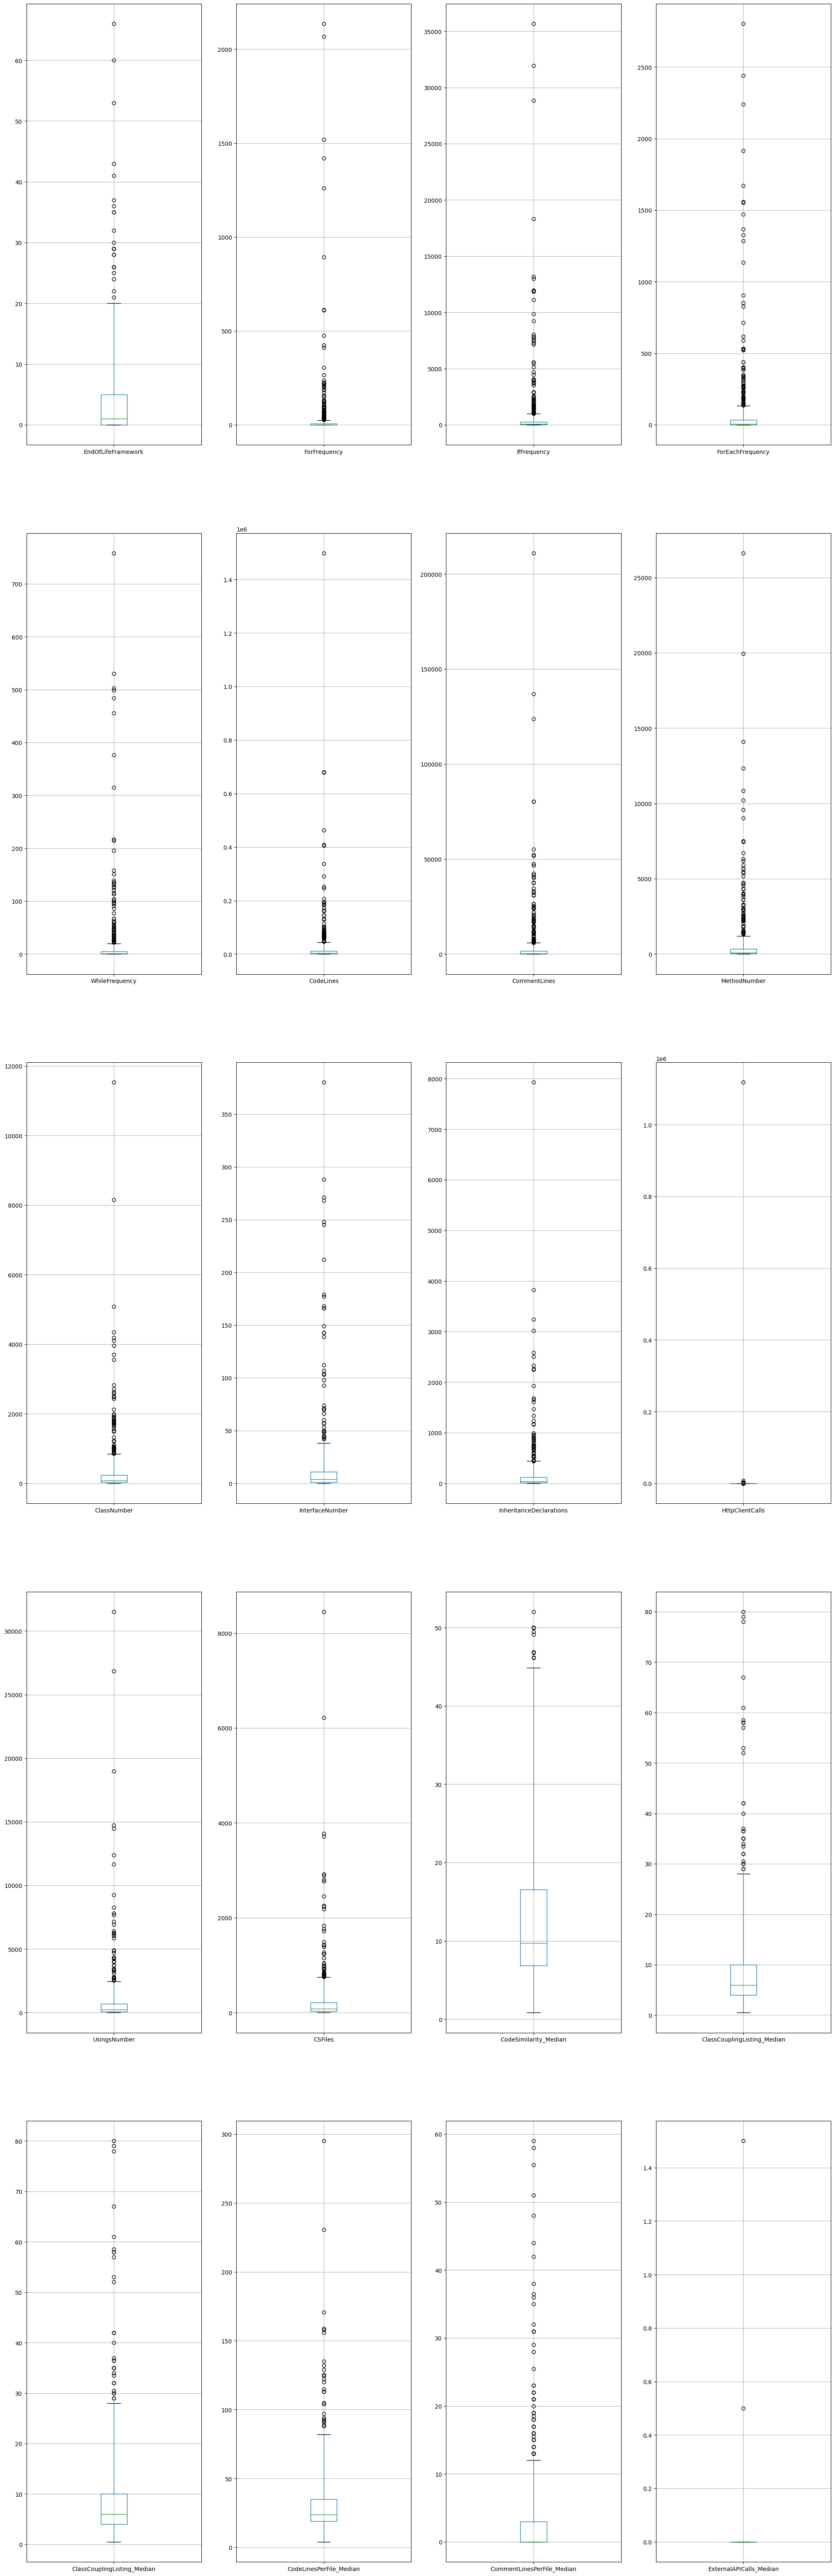

In [93]:
columns = dfcopy.select_dtypes(include=np.number).columns
col_nr = round(len(columns)/5)
fig, axes = plt.subplots(5, col_nr,  figsize=(25,80))
for i in range(col_nr):
    dfcopy.boxplot(column=columns[i], ax=axes[0][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+4], ax=axes[1][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+8], ax=axes[2][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+12], ax=axes[3][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+15], ax=axes[4][i], showfliers=True, whis=3)

Removing outliers based on percentiles

In [94]:
columns = dfcopy.select_dtypes(include=np.number).columns
dfcopy = remove_outliers(columns, dfcopy)


In [95]:
dfcopy.drop(columns=['Project_Name','Project_ID','ClassCouplingListing', 'CodeSimilarity', 'ExternalAPICalls', 'ExternalAPIExtracted','CodeLinesPerFile','CommentLinesPerFile'], axis=1,inplace=True)

Multiple imputation with knn imputation to remove 0s

Imputing twice to account for nan's and 0's

In [96]:
dfcopy

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
0,0,18,1041,82,11,17643,2632,473,168,0,24,22,326,103,11,8,NaN,1,NaN
1,0,0,24,2,1,1713,36,48,56,3,29,0,247,64,6,6,22,0,0
2,0,0,7,1,0,1497,100,32,58,1,40,0,241,46,5,8,28,0,0
3,0,0,82,17,0,6313,361,109,144,10,72,2,552,154,15,6,21,0,0
4,0,1,15,3,0,1010,2,17,33,4,20,0,111,53,7,6,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,4,431,33,7,11249,404,518,214,12,127,4,357,235,12,6,27,0,0
596,2,0,6,2,0,442,42,20,7,0,0,0,13,9,6,7,18,1,0
597,7,0,3,0,0,460,16,17,17,2,7,0,84,19,9,3,20,0,0
598,3,0,2,2,3,156,37,8,5,0,1,0,11,3,NaN,8,45,2,0


In [97]:
imputed_nans = impute_nans(dfcopy)
imputed_nans.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,2,12,311,34,6,12381,1516,296,194,8,95,36,476,165,11,7,26,1,0
std,2,27,563,60,13,20019,2723,413,247,9,123,355,556,187,5,3,9,2,0
min,0,0,0,0,0,11,0,0,1,0,0,-1,0,1,1,0,4,0,0
25%,0,0,16,1,0,1237,43,34,31,1,12,0,90,34,7,4,19,0,0
50%,1,0,67,7,1,3826,251,104,86,4,40,0,250,84,10,6,24,0,0
75%,3,6,248,32,5,12012,1506,351,232,11,119,2,666,214,15,8,32,3,0
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8,0


In [98]:
imputed_nans.drop('ExternalAPICalls_Median', inplace=True, axis=1)
dfcopy = impute_zero_values(imputed_nans)

In [99]:
dfcopy.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,15,311,35,7,12381,1516,296,194,9,95,61,479,165,11,7,26,3
std,2,27,563,60,12,20019,2723,413,247,9,123,362,556,187,5,3,9,2
min,0,1,1,1,1,11,1,1,1,1,1,-1,1,1,1,0,4,0
25%,1,2,16,2,2,1237,44,34,31,2,12,4,91,34,7,4,19,2
50%,3,2,67,8,2,3826,251,104,86,5,40,13,254,84,10,6,24,3
75%,4,12,248,33,6,12012,1506,351,232,12,119,27,669,214,15,8,32,4
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8


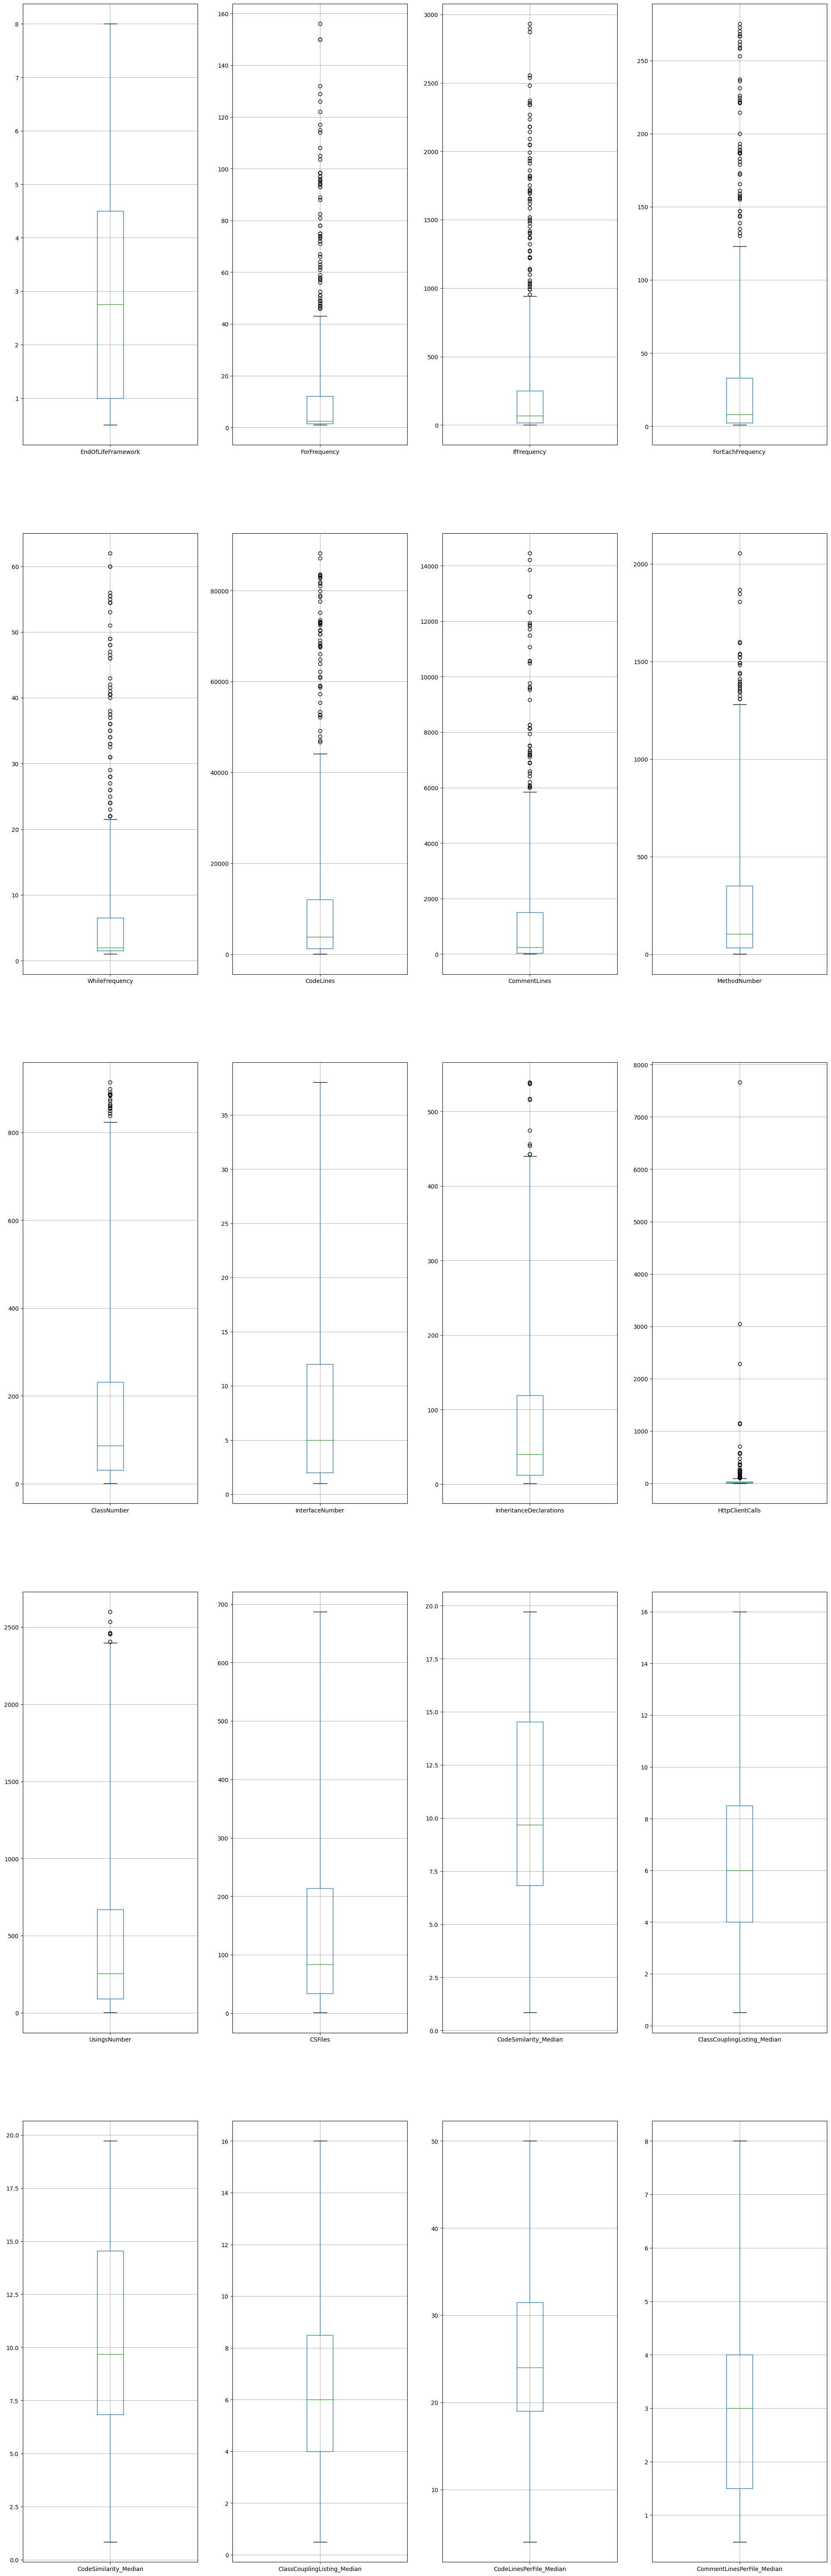

In [100]:
columns = dfcopy.select_dtypes(include=np.number).columns
col_nr = round(len(columns)/5)
fig, axes = plt.subplots(5, col_nr,  figsize=(25,80))
for i in range(col_nr):
    dfcopy.boxplot(column=columns[i], ax=axes[0][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+4], ax=axes[1][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+8], ax=axes[2][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+12], ax=axes[3][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+14], ax=axes[4][i], showfliers=True, whis=3)

In [101]:
dfcopy.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,15,311,35,7,12381,1516,296,194,9,95,61,479,165,11,7,26,3
std,2,27,563,60,12,20019,2723,413,247,9,123,362,556,187,5,3,9,2
min,0,1,1,1,1,11,1,1,1,1,1,-1,1,1,1,0,4,0
25%,1,2,16,2,2,1237,44,34,31,2,12,4,91,34,7,4,19,2
50%,3,2,67,8,2,3826,251,104,86,5,40,13,254,84,10,6,24,3
75%,4,12,248,33,6,12012,1506,351,232,12,119,27,669,214,15,8,32,4
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8


In [102]:
def histograms(dfcopy):
    columns = dfcopy.select_dtypes(include=np.number).columns
    num_columns = len(columns)
    num_rows = int(np.ceil(num_columns / 4))

    fig, axes = plt.subplots(num_rows, 4, figsize=(12, num_rows * 3))

    for i, column in enumerate(columns):
        row_index = i // 4
        col_index = i % 4
        axes[row_index, col_index].hist(dfcopy[column])
        axes[row_index, col_index].set_title(column)

    for i in range(num_columns, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

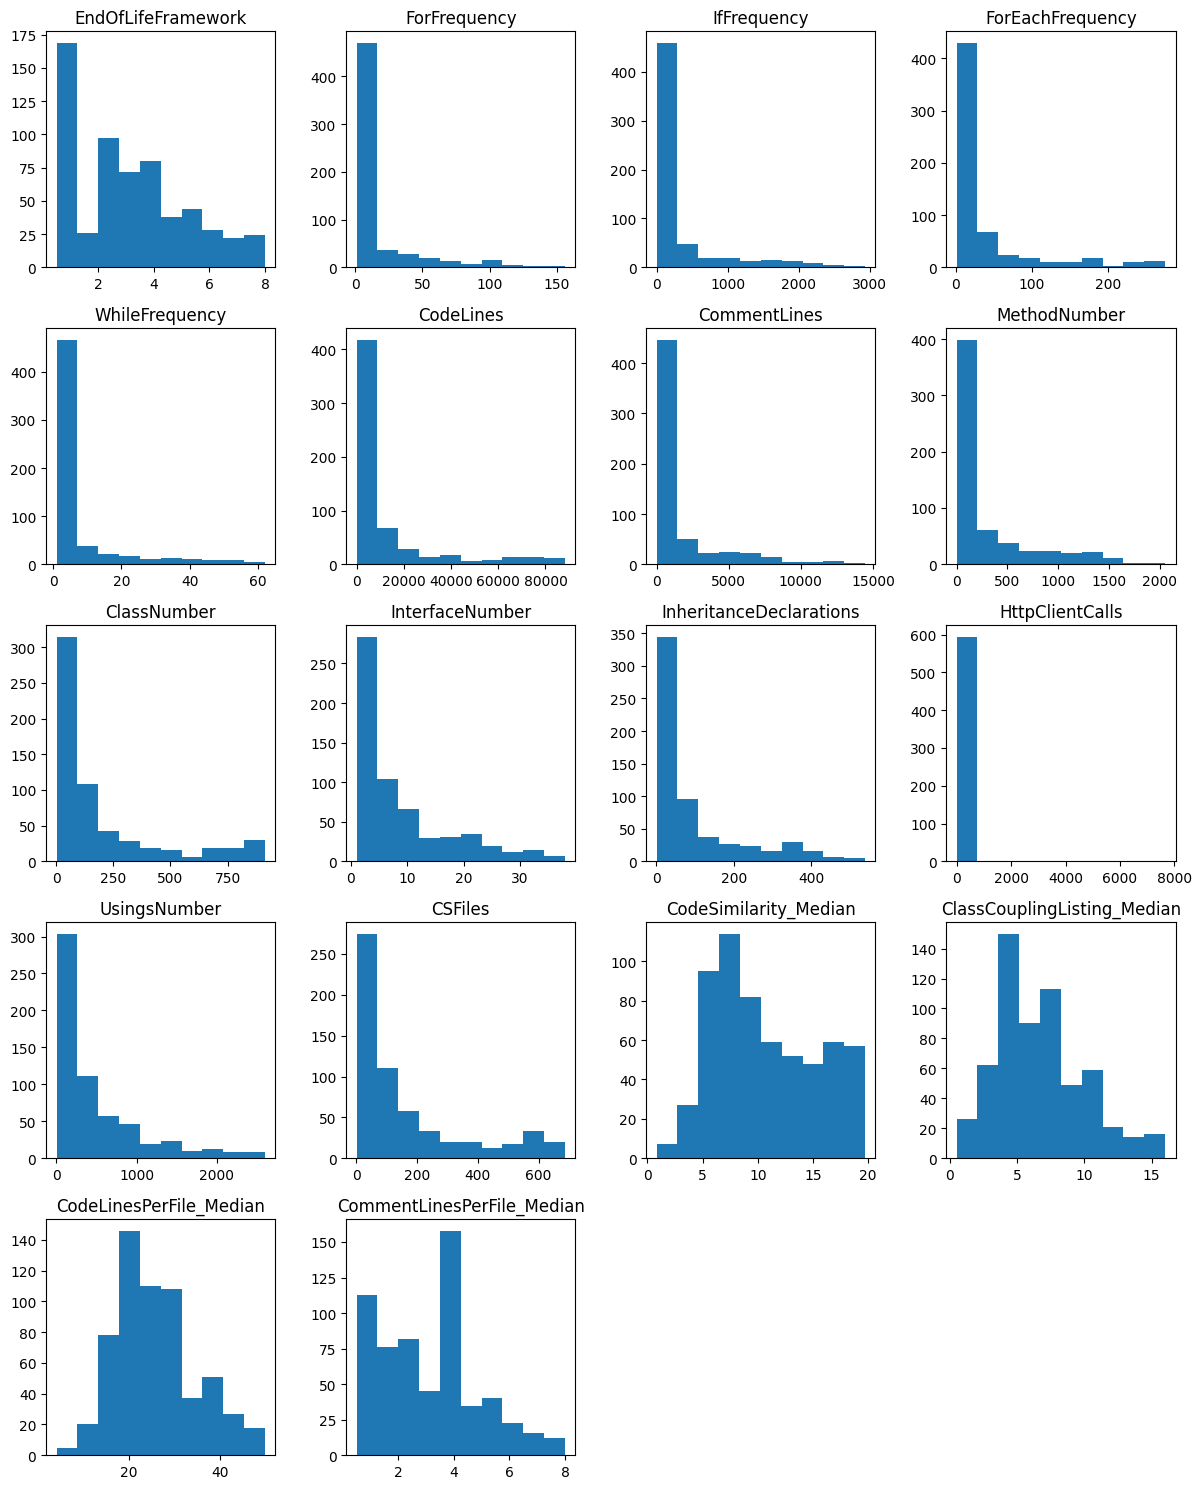

In [103]:
histograms(dfcopy)

In [104]:
dfcopy = combine_term_frequency(dfcopy)

In [105]:
dfcopy.describe()

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,12381,1516,296,194,9,95,61,479,165,11,7,26,3,367
std,2,20019,2723,413,247,9,123,362,556,187,5,3,9,2,645
min,0,11,1,1,1,1,1,-1,1,1,1,0,4,0,5
25%,1,1237,44,34,31,2,12,4,91,34,7,4,19,2,23
50%,3,3826,251,104,86,5,40,13,254,84,10,6,24,3,88
75%,4,12012,1506,351,232,12,119,27,669,214,15,8,32,4,297
max,8,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8,3354


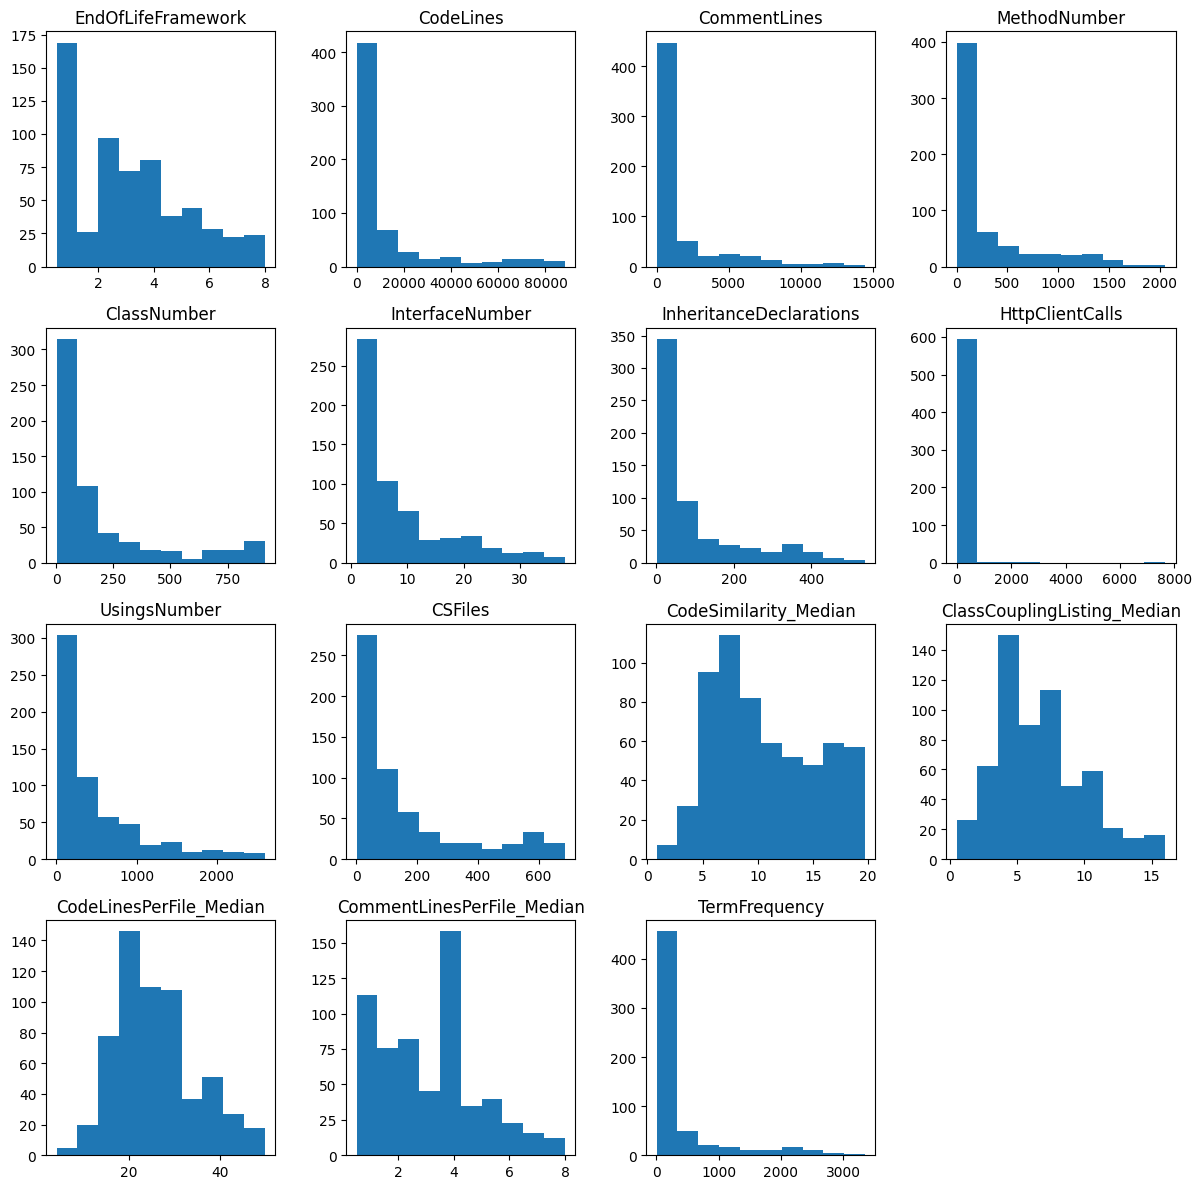

In [106]:
histograms(dfcopy)

In [107]:
columns = ['CodeLines', 'CommentLines', 'MethodNumber',
       'ClassNumber', 'InterfaceNumber','InheritanceDeclarations', 
       'UsingsNumber','HttpClientCalls', 'CSFiles','TermFrequency','CodeSimilarity_Median',
       'ClassCouplingListing_Median', 'CodeLinesPerFile_Median','CommentLinesPerFile_Median', 'TermFrequency','EndOfLifeFramework']
yeojohnson(columns, dfcopy)

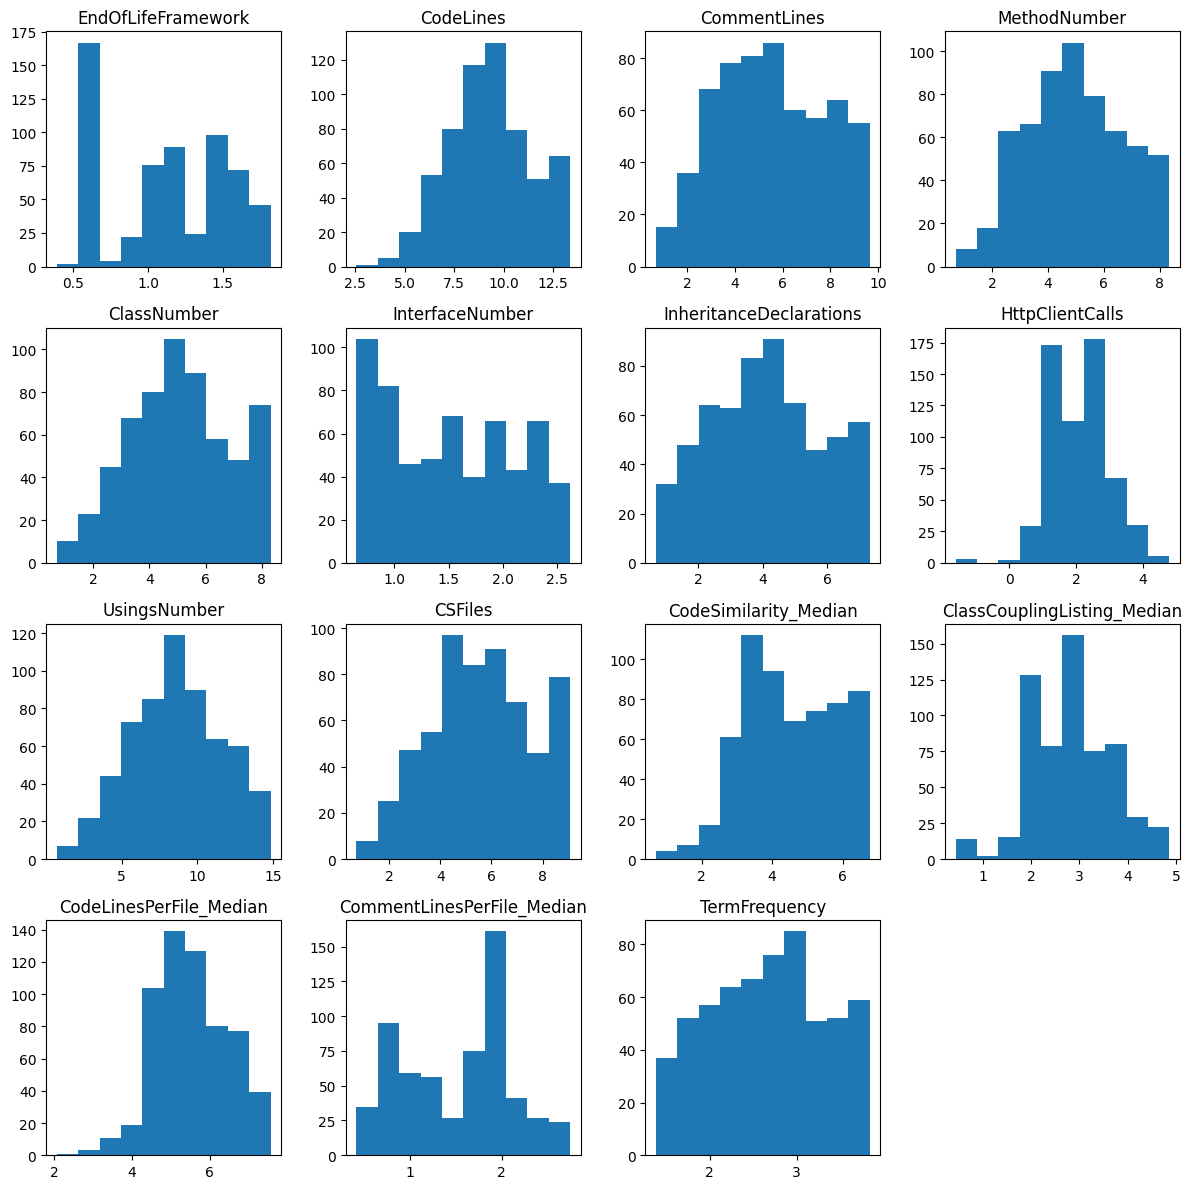

In [108]:
histograms(dfcopy)

In [109]:
column_std = dfcopy.std()

sorted_columns = column_std.sort_values(ascending=False)

print(sorted_columns)

UsingsNumber                  3
CommentLines                  2
CodeLines                     2
CSFiles                       2
ClassNumber                   2
MethodNumber                  2
InheritanceDeclarations       2
CodeSimilarity_Median         1
CodeLinesPerFile_Median       1
HttpClientCalls               1
ClassCouplingListing_Median   1
TermFrequency                 1
InterfaceNumber               1
CommentLinesPerFile_Median    1
EndOfLifeFramework            0
dtype: float64


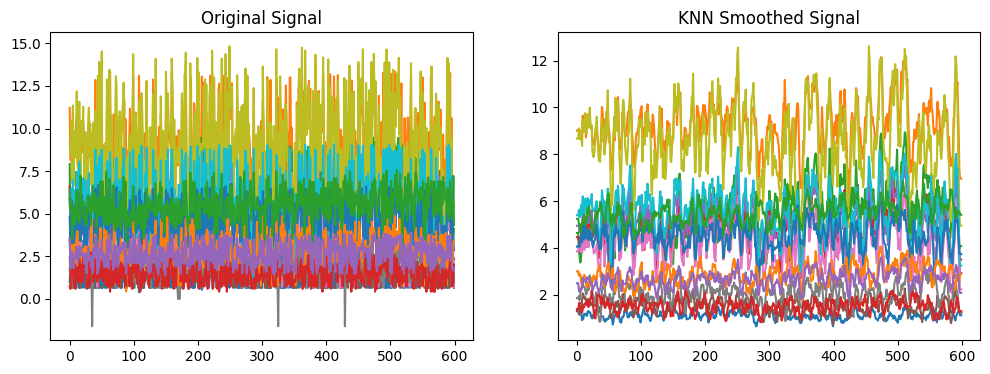

In [110]:
window_size_knn = 5

smoothed_signal_knn = knn_smoothing(dfcopy, window_size_knn)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(dfcopy)
plt.title('Original Signal')

plt.subplot(1, 2, 2)
plt.plot(smoothed_signal_knn)
plt.title('KNN Smoothed Signal')

plt.show()

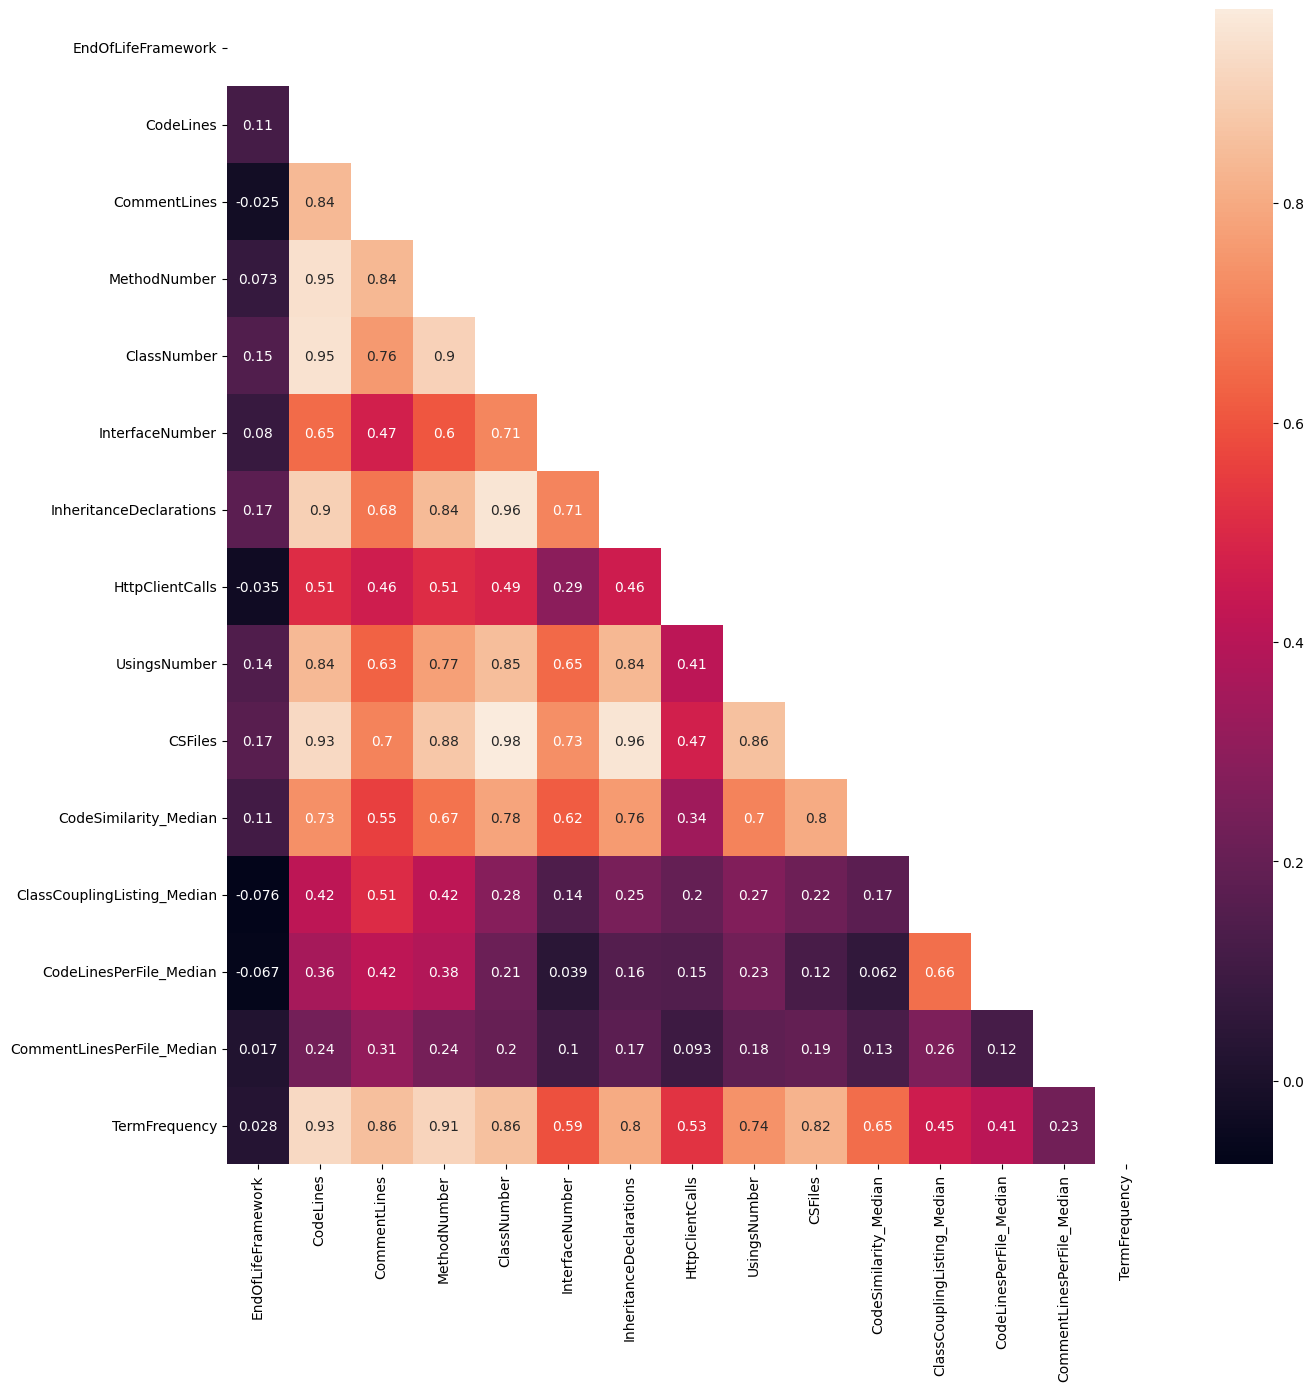

In [111]:
corr_m = dfcopy.corr()

mask = np.triu(corr_m)

plt.figure(figsize=(15,15))

sns.heatmap(corr_m, annot=True, mask=mask)
plt.show()

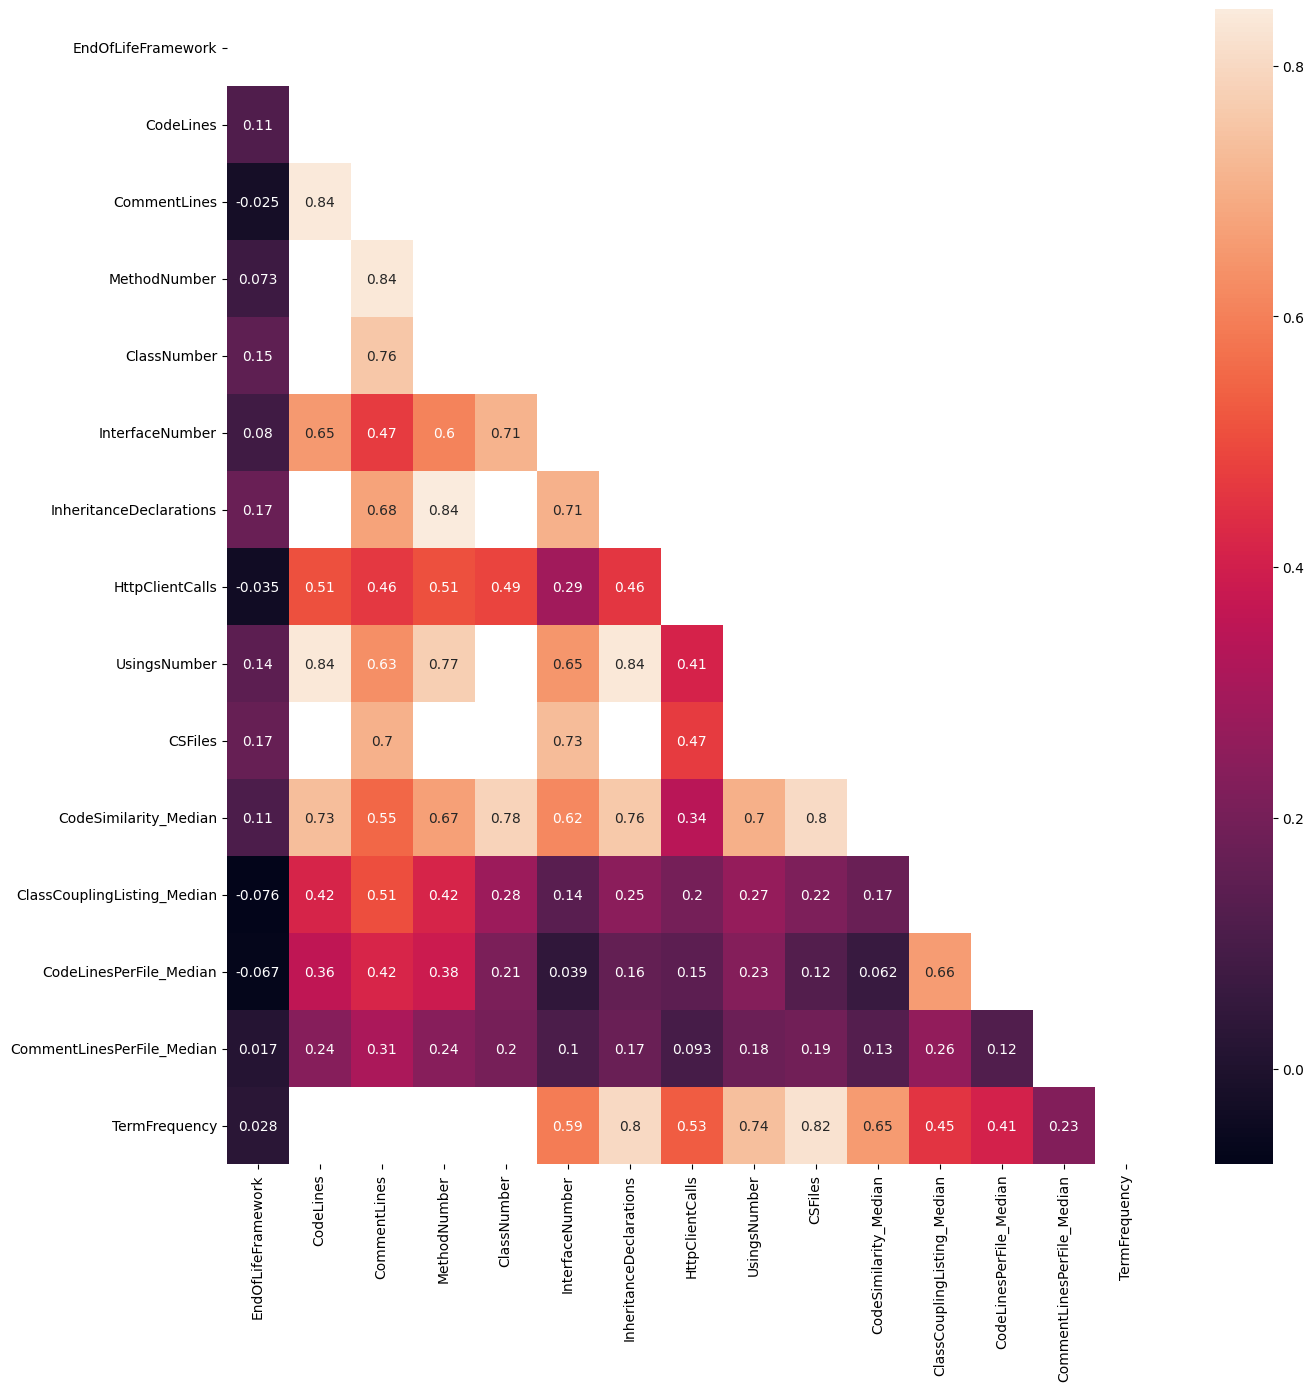

In [112]:
# Remove high correlation from sns
corr = (corr_m[(corr_m < 0.85)].dropna(thresh=2).dropna(thresh=2, axis=1))
mask = np.triu(corr)

plt.figure(figsize=(15,15))

sns.heatmap(corr, annot=True, mask=mask)
plt.show()

# PCA


In [113]:
knn_df = smoothed_signal_knn

In [114]:
X_s = preprocessing.StandardScaler().fit_transform(knn_df)
pcas = decomposition.PCA(n_components=2)
ress = pcas.fit_transform(X_s)
print(pcas.explained_variance_ratio_)
print('Explained variance: ', np.sum(pcas.explained_variance_ratio_))

[0.57159018 0.14395762]
Explained variance:  0.7155478048462006


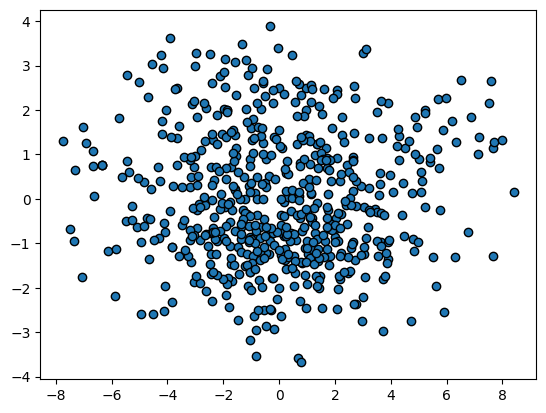

In [115]:
scatter = plt.scatter(ress[:, 0], ress[:, 1],edgecolors='black')
plt.show()

K Means

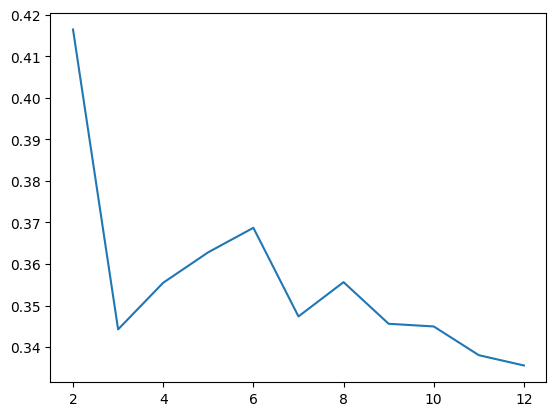

In [116]:
from sklearn.metrics import silhouette_score
silhouette = []
n_clusters = range(2,13)
for n in n_clusters:
    k_mean = cluster.KMeans(n_clusters=n, random_state=88, n_init=10)
    k_mean_clus = k_mean.fit_predict(ress)
    silhouette.append(silhouette_score(ress, k_mean.labels_))

plt.plot(n_clusters, silhouette)
plt.show()

## It can be seen that the elbow lies at 7

In [117]:
#Initialize the class object
kmeans = KMeans(n_clusters=7,n_init=10)
newpca = pcas.fit_transform(X_s)
means = kmeans.fit_predict(newpca)

centroids = kmeans.cluster_centers_

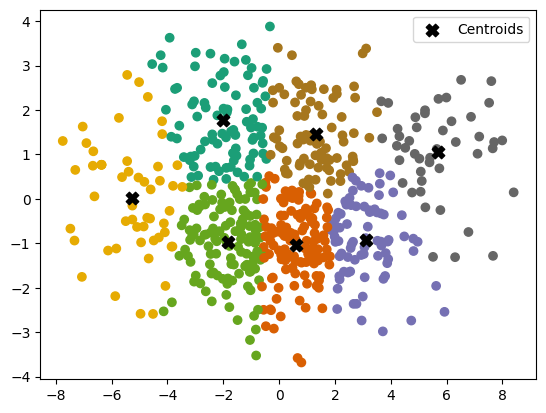

In [118]:
plt.scatter(newpca[:,0],newpca[:,1], c=means, cmap='Dark2')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 80, color='k', marker='X', label='Centroids')
plt.legend()
plt.show()

# DBSCAN

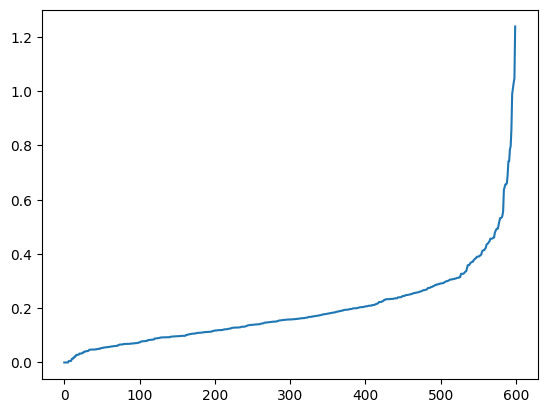

In [119]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=14)
neighbors_fit = neighbors.fit(ress)
distances, indices = neighbors_fit.kneighbors(ress)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [120]:
dbscan=DBSCAN(eps = 0.59, min_samples = 17)
yhat = dbscan.fit_predict(ress)
clusters = np.unique(yhat)
len(clusters)

2

## With noise

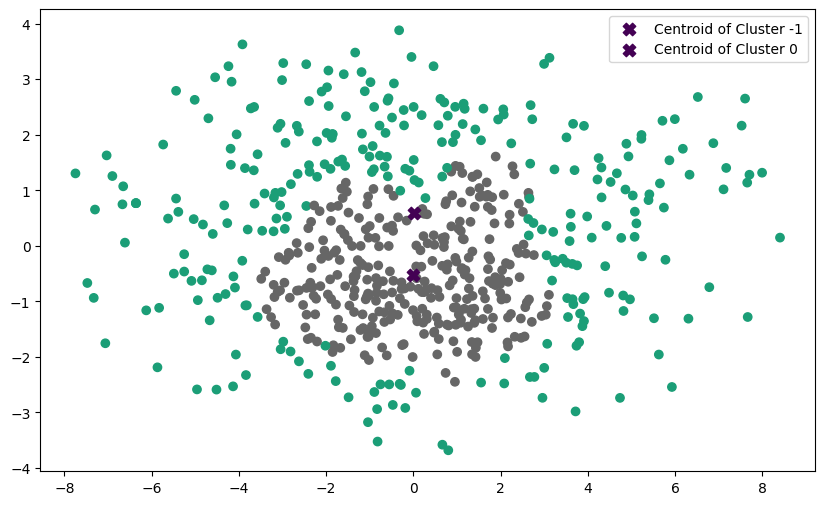

In [121]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(ress[:,0], ress[:,1] , c=yhat, cmap='Dark2')
plt.legend(handles=scatter.legend_elements(prop='colors' , num=len(clusters))[0], labels=list(unique(yhat)))

for cluster in clusters:
    cluster_points = ress[yhat == cluster]
    centroid = np.mean(cluster_points, axis=0)
    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color,
                label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

## After filtering out the noise

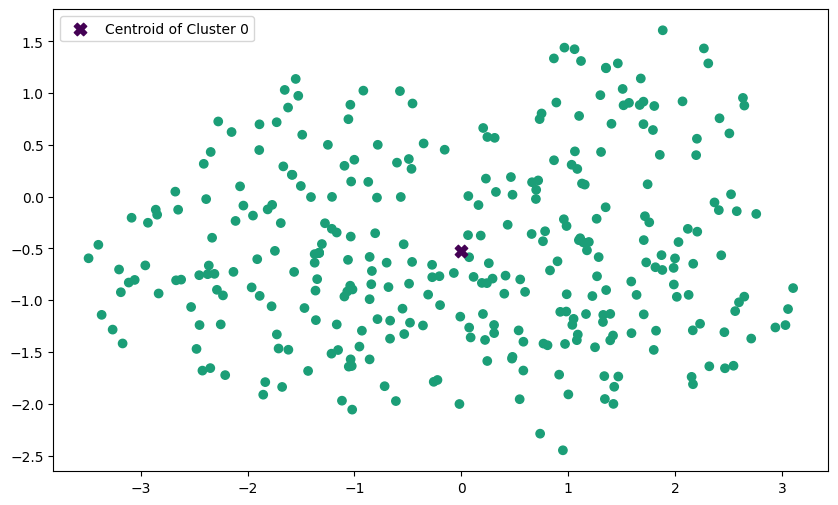

In [122]:
plt.figure(figsize=(10, 6))

filtered_points = ress[yhat != -1]
filtered_labels = yhat[yhat != -1]

scatter = plt.scatter(filtered_points[:, 0], filtered_points[:, 1], c=filtered_labels, cmap='Dark2')

plt.legend(handles=scatter.legend_elements(prop='colors' , num=len(clusters))[0], labels=list(unique(yhat)))

for cluster in clusters:
    if cluster != -1:
        cluster_points = ress[yhat == cluster]
        centroid = np.mean(cluster_points, axis=0)
        centroid_color = plt.cm.viridis(cluster / len(clusters))

        plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color,
                    label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Gausian Mixture Clustering

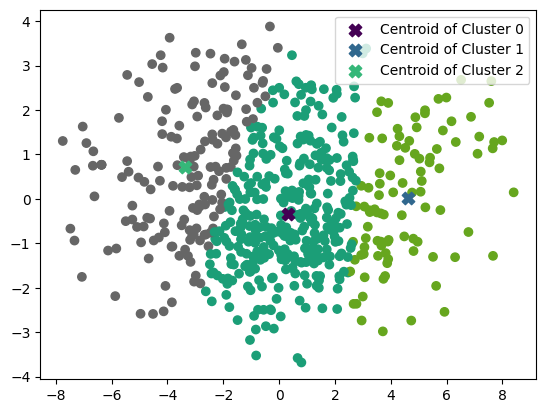

In [157]:
gaussian_mdl = GaussianMixture(n_components=3, random_state=42)
gaussian_mdl.fit(ress)
gaussian_res = gaussian_mdl.fit_predict(ress)

clusters = np.unique(gaussian_res) # get the unique clusters

scatter = plt.scatter(ress[:,0], ress[:,1] , c=gaussian_res, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[gaussian_res == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Birch Clustering

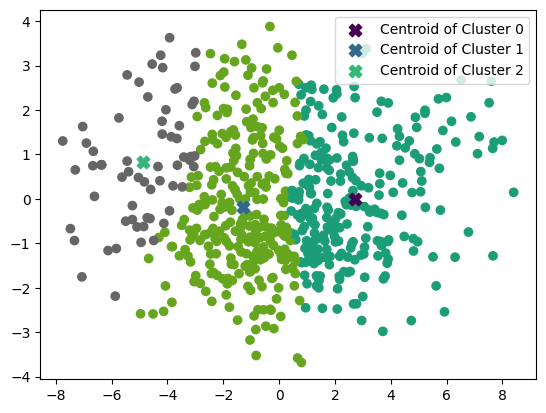

In [124]:
birch_model = Birch(branching_factor=50, n_clusters=3, threshold=1.75)
birch_model.fit(ress)
birch_res = birch_model.fit_predict(ress)

clusters = np.unique(birch_res) # get the clusters
scatter = plt.scatter(ress[:,0], ress[:,1] , c=birch_res, cmap='Dark2')


for cluster in clusters:
    cluster_points = ress[birch_res == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Meanshift clustering

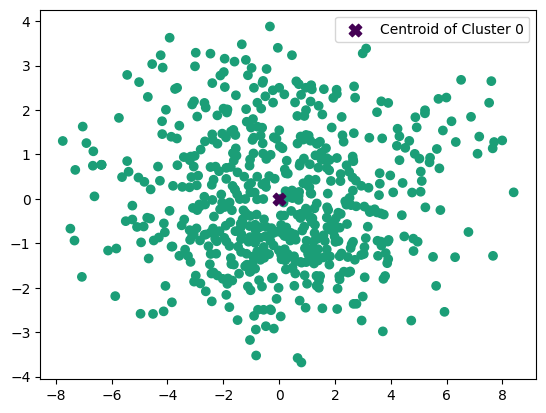

In [125]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=2)
meanshit_ress = ms.fit_predict(ress)
labels = ms.labels_
clusters = np.unique(meanshit_ress)
centers = ms.cluster_centers_
scatter = plt.scatter(ress[:,0], ress[:,1] , c=labels, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[meanshit_ress == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Bayesian Gaussian Mixture

C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\mixture\_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\mixture\_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Loca

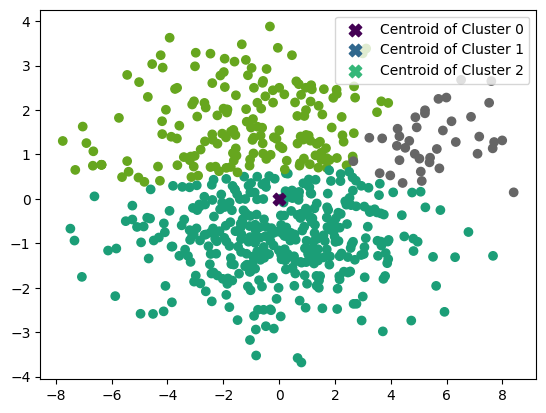

In [126]:
bgm = BayesianGaussianMixture(n_components=3, random_state=54)
bgm.fit(ress)
bgm_res = bgm.fit_predict(ress)
clusters = np.unique(bgm_res)

scatter = plt.scatter(ress[:,0], ress[:,1] , c=bgm_res, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[meanshit_ress == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

In [127]:
import sys
!{sys.executable} -m pip install git

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\sgt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# GM

## Extract points closest to centroids

In [158]:
gaussian_res

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,

In [156]:
clusters = np.unique(gaussian_res)

selected_points_in_clusters = {}

for cluster in clusters:
    cluster_indices = np.where(gaussian_res == cluster)[0]
    sorted_indices = np.argsort(cluster_indices)

    cluster_points = ress[cluster_indices[sorted_indices]]
    centroid = np.mean(cluster_points, axis=0)

    distances = np.linalg.norm(cluster_points - centroid, axis=1)

    # Top closest points to the centroids
    k = 5
    closest_indices = np.argsort(distances)[:k]
    closest_points = cluster_points[closest_indices]

    selected_points_in_clusters[cluster] = closest_points

for cluster, points in selected_points_in_clusters.items():
    print(f'{cluster} {points}')

0 [[ 0.18182984 -0.37519451]
 [ 0.4339541  -0.27103339]
 [ 0.06283497 -0.37109868]
 [ 0.2574764  -0.64212185]
 [ 0.16067363 -0.08054865]]
1 [[ 4.76225067  0.14372148]
 [ 4.4237734   0.35909727]
 [ 4.39571255 -0.36642207]
 [ 5.06934083  0.16190287]
 [ 4.0863341   0.1476244 ]]
2 [[-3.1979086   0.87096165]
 [-3.41199853  0.94178119]
 [-3.64137583  0.75929162]
 [-3.0556526   0.72850209]
 [-3.16458225  0.95396083]]


## Map points to rows and load them in a dataframe

In [129]:
original_rows = {}

for cluster, points in selected_points_in_clusters.items():
    print(points)
    original_indices = np.where(np.isin(ress, points).all(axis=1))[0]
    original_rows[cluster] = dataframe.iloc[original_indices]
    
for cluster, row in original_rows.items():
    print(f'{cluster} {row}')

[[ 0.18182984 -0.37519451]
 [ 0.4339541  -0.27103339]
 [ 0.06283497 -0.37109868]
 [ 0.2574764  -0.64212185]
 [ 0.16067363 -0.08054865]]
[[ 4.76225067  0.14372148]
 [ 4.4237734   0.35909727]
 [ 4.39571255 -0.36642207]
 [ 5.06934083  0.16190287]
 [ 4.0863341   0.1476244 ]]
[[-3.1979086   0.87096165]
 [-3.41199853  0.94178119]
 [-3.64137583  0.75929162]
 [-3.0556526   0.72850209]
 [-3.16458225  0.95396083]]
0                                Project_ID                      Project_Name  \
98   a3e4f927-d4a2-4bec-95af-ad259bfab4ab  felipefca_ExemploSeguros-BackEnd   
321  919fb99a-9fd1-49f5-9b36-456bf01e536b              aspnetrun_run-devops   
391  76380a6a-1ab3-41e7-808b-4f956c2c6567    FeroxRev_Pokemon-Go-Rocket-API   
402  3c1aeb01-aefd-4992-befc-54ac862c8cdd         GuillaumeSalles_redux.NET   
460  c5140994-d03d-40ab-a78e-3f52dae320b9            mattkol_SugarRestSharp   

     EndOfLifeFramework  ForFrequency  IfFrequency  ForEachFrequency  \
98                    0             4      

In [130]:
gsm_clustered_df = pd.concat([df.assign(Cluster=cluster) for cluster, df in original_rows.items()])
gsm_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster
98,a3e4f927-d4a2-4bec-95af-ad259bfab4ab,felipefca_ExemploSeguros-BackEnd,0,4,70,19,1,10348,85,192,...,110,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,577,"[1, 31, 4, 11, 6, 9, 9, 5, 5, 5, 6, 5, 18, 5, ...","[15, 48, 20, 72, 10, 17, 17, 10, 9, 12, 20, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3.03, 6.76, 7.32, 1.03, 0.25, 0.69, 0.75, 0.7...",238,0
321,919fb99a-9fd1-49f5-9b36-456bf01e536b,aspnetrun_run-devops,2,0,3,0,0,335,5,9,...,1,"[0, 3, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, ...",1,63,"[3, 10, 8, 29, 1, 3, 13, 10, 0, 0]","[24, 48, 32, 83, 16, 24, 48, 39, 9, 12]","[0, 2, 0, 0, 0, 0, 3, 0, 0, 0]","[11.53, 10.51, 19.43, 2.7, 19.3, 43.18, 8.75, ...",10,0
391,76380a6a-1ab3-41e7-808b-4f956c2c6567,FeroxRev_Pokemon-Go-Rocket-API,1,3,14,1,2,1438,59,14,...,19,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",31,157,"[13, 0, 0, 0, 0, 0, 0, 0, 0, 1, 17, 5, 0, 1, 6...","[55, 16, 12, 8, 7, 10, 14, 11, 12, 7, 7, 12, 8...","[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, ...","[3.74, 0.89, 1.12, 5.31, 7.43, 1.22, 5.99, 6.8...",34,0
402,3c1aeb01-aefd-4992-befc-54ac862c8cdd,GuillaumeSalles_redux.NET,5,0,55,1,0,2205,332,88,...,37,"[0, 0, 0, 0, 0, 0, 0]",0,178,"[6, 1, 1, 3, 2, 9, 6, 1, 5, 0, 1, 1, 0, 5, 1, ...","[32, 10, 8, 34, 29, 13, 15, 29, 23, 14, 29, 5,...","[1, 0, 0, 0, 0, 4, 13, 0, 0, 13, 0, 0, 0, 0, 1...","[14.43, 2.84, 6.28, 7.43, 2.46, 8.93, 0.97, 7....",77,0
460,c5140994-d03d-40ab-a78e-3f52dae320b9,mattkol_SugarRestSharp,4,5,143,55,1,8852,2941,142,...,127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,15,"[20, 15, 18, 10, 11, 15, 12, 34, 58, 15, 15, 5...","[11, 11, 12, 14, 12, 42, 20, 122, 16, 181, 11,...","[22, 22, 26, 31, 25, 56, 20, 57, 24, 48, 18, 1...","[46.79, 2.78, 69.06, 73.81, 72.88, 64.12, 67.5...",189,0
249,69bfa94a-e830-441d-a470-27a2aa8aa642,simplcommerce_SimplCommerce,1,9,876,181,13,39759,1728,575,...,402,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12,2600,"[9, 1, 1, 8, 5, 5, 9, 7, 2, 0, 0, 12, 8, 7, 8,...","[125, 12, 16, 24, 27, 14, 31, 10, 35, 17, 15, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7.03, 7.58, 0.87, 5.94, 4.88, 5.57, 1.93, 4.8...",795,1
369,a246f2e6-1c54-462b-bd49-b3949503c2c2,domaindrivendev_Swashbuckle.WebApi,6,2,126,24,2,6954,588,362,...,90,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,397,"[2, 8, 4, 5, 2, 6, 8, 46, 16, 16, 11, 5, 4, 12...","[35, 91, 26, 51, 28, 27, 104, 272, 63, 143, 49...","[0, 0, 0, 0, 0, 0, 1, 4, 2, 3, 0, 0, 0, 17, 4,...","[4.33, 1.4, 17.58, 59.33, 1.94, 12.43, 4.69, 2...",120,1
489,f74c5050-d975-4b03-97ed-0f97f5af09f0,NLog_NLog,0,411,5121,402,104,103787,47493,4752,...,684,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,704,"[72, 75, 8, 4, 4, 3, 4, 3, 4, 5, 4, 3, 6, 3, 3...","[33, 15, 28, 15, 35, 25, 7, 26, 7, 9, 16, 23, ...","[44, 14, 48, 14, 0, 2, 9, 3, 9, 0, 6, 0, 0, 0,...","[1.97, 4.67, 94.46, 0.84, 1.15, 59.06, 0.64, 1...",780,1
497,ca77a59a-007b-40c5-a41b-c16453358961,ooples_OoplesFinance.StockIndicators,0,1261,88,5,3,35832,6513,799,...,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,"[44, 49, 34, 283, 26, 57, 52, 361, 583, 51, 49...","[419, 496, 232, 4928, 188, 569, 450, 6162, 921...","[88, 109, 47, 868, 46, 128, 109, 1087, 1779, 5...","[89.88, 81.85, 89.33, 86.32, 88.63, 90.71, 92....",58,1
498,44138293-56a5-4e40-80b5-cdc0d6c1e142,open-telemetry_opentelemetry-dotnet,1,213,1992,319,55,63946,22054,2715,...,330,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",58,1925,"[29, 26, 20, 28, 22, 31, 31, 31, 25, 27, 46, 2...","[31, 32, 13, 46, 28, 39, 28, 31, 46, 18, 64, 4...","[20, 16, 15, 17, 15, 24, 22, 17, 15, 18, 28, 1...","[34.51, 0.64, 0.03, 9.29, 0.02, 3.04, 2.27, 0....",671,1


In [131]:
gsm_clustered_df = combine_term_frequency(gsm_clustered_df)

In [132]:
columns_to_plot = ['CodeLines','ClassNumber','ClassNumber','TermFrequency','CSFiles','Cluster']
gsm_clustered_df[columns_to_plot]

,CodeLines,ClassNumber,ClassNumber,TermFrequency,CSFiles,Cluster
98,10348,215,215,94,238,0
321,335,10,10,3,10,0
391,1438,31,31,20,34,0
402,2205,82,82,56,77,0
460,8852,324,324,204,189,0
249,39759,742,742,1079,795,1
369,6954,164,164,154,120,1
489,103787,1051,1051,6038,780,1
497,35832,51,51,1357,58,1
498,63946,884,884,2579,671,1


# K Means

In [133]:
kmeans = KMeans(n_clusters=7,n_init=10)
newpca = pcas.fit_transform(X_s)
means = kmeans.fit_predict(newpca)

centroids = kmeans.cluster_centers_

0 {'Centroid': (0.23581909925627464, -1.165901611900453), 'ClosestPoint': (0.20251542053667057, -1.1324736052064273)}
1 {'Centroid': (2.9361835311623308, -0.9309619345872092), 'ClosestPoint': (3.1053095323280697, -0.8823645773733193)}
2 {'Centroid': (5.655413984345207, 1.0428013028596923), 'ClosestPoint': (5.64943202737276, 1.1241372847925517)}
3 {'Centroid': (-5.343002897012236, 0.2820485424503025), 'ClosestPoint': (-5.388649735080834, 0.6118460705226081)}
4 {'Centroid': (-1.824627591879028, 1.8585039257567932), 'ClosestPoint': (-1.8706470941374025, 1.9455203156476506)}
5 {'Centroid': (1.3638527805004512, 1.3452404820856747), 'ClosestPoint': (1.3527739740753943, 1.245855982856972)}
6 {'Centroid': (-2.182746100738343, -0.8044838428962046), 'ClosestPoint': (-2.1325861202266756, -0.7257254954816934)}


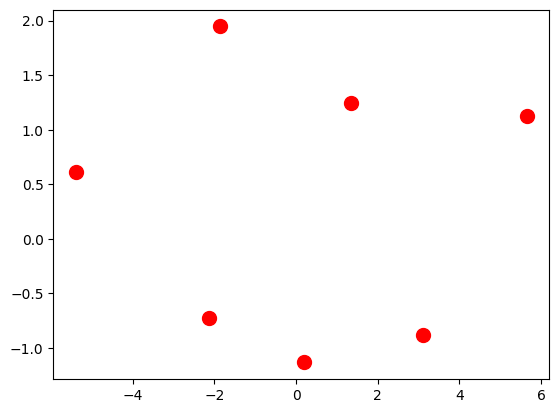

In [134]:
selected_points_in_clusters_km = {}

for i, centroid in enumerate(centroids):
    cluster_points = newpca[means == i]
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = cluster_points[closest_point_index]

    centroid_tuple = tuple(centroid)
    closest_point_tuple = tuple(closest_point)

    selected_points_in_clusters_km[i] = {'Centroid': centroid_tuple, 'ClosestPoint': closest_point_tuple}
    plt.scatter(closest_point[0], closest_point[1], s=100, color='red', marker='o', label=f'Closest Point to Centroid {i}')


for cluster, points in selected_points_in_clusters_km.items():
    print(f'{cluster} {points}')

## Map points to rows

In [135]:
original_rows = {}

for cluster, points_info in selected_points_in_clusters_km.items():
    closest_point_tuple = points_info['ClosestPoint']
    distances = np.linalg.norm(ress - np.array(closest_point_tuple), axis=1)
    closest_index = np.argmin(distances)
    original_rows[cluster] = dataframe.iloc[closest_index]

for cluster, row in original_rows.items():
    print(f'{cluster} {row}')

0 Project_ID                              63c242ec-fcca-4ca3-a1c2-97940398f8b1
Project_Name                              aramkoukia_microservices-prototype
EndOfLifeFramework                                                         0
ForFrequency                                                               1
IfFrequency                                                               53
ForEachFrequency                                                          12
WhileFrequency                                                             2
CodeLines                                                               2989
CommentLines                                                            1041
MethodNumber                                                             124
ClassNumber                                                               93
InterfaceNumber                                                            4
InheritanceDeclarations                                                   

In [136]:
kmeans_clustered_df = pd.DataFrame(original_rows.values())
kmeans_clustered_df['Cluster'] = original_rows.keys()
kmeans_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster
22,63c242ec-fcca-4ca3-a1c2-97940398f8b1,aramkoukia_microservices-prototype,0,1,53,12,2,2989,1041,124,...,47,"[0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,296,"[10, 6, 4, 30, 7, 16, 11, 14, 4, 40, 1, 1, 3, ...","[8, 43, 48, 28, 15, 146, 26, 87, 13, 12, 63, 2...","[0, 3, 0, 0, 17, 1, 0, 0, 0, 0, 0, 0, 0, 29, 0...","[4.88, 21.96, 3.13, 3.24, 3.85, 3.61, 2.47, 0....",84,0
207,277b06b5-1faa-433f-9f3b-e8e33d0934c5,OpenCodeFoundation_eSchool,10,0,28,2,0,2004,37,68,...,23,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,276,"[17, 6, 18, 7, 6, 0, 3, 11, 14, 16, 4, 20, 28,...","[71, 53, 53, 36, 24, 7, 12, 30, 90, 71, 57, 14...","[2, 0, 4, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, ...","[77.83, 9.46, 12.32, 13.74, 2.13, 1.86, 5.73, ...",61,1
499,fe00f4c6-9a09-4bfc-bbc9-fd0bbf41983d,openpetra_openpetra,1,425,11129,1472,315,172678,55092,4667,...,213,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,6204,"[39, 128, 48, 82, 37, 63, 21, 64, 139, 110, 49...","[71, 256, 112, 400, 43, 94, 90, 384, 1184, 469...","[25, 104, 47, 145, 33, 51, 12, 100, 470, 72, 4...","[13.82, 3.8, 1.98, 7.51, 7.76, 10.9, 6.41, 5.8...",517,2
291,72cd5031-5531-4f0f-857b-04e96614d201,WolfgangOfner_MicroserviceDemo,5,2,27,1,3,3526,147,133,...,50,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,402,"[6, 1, 4, 8, 4, 1, 3, 48, 19, 7, 7, 2, 4, 4, 4...","[38, 11, 11, 43, 17, 10, 20, 152, 85, 17, 18, ...","[2, 0, 0, 0, 0, 0, 0, 1, 22, 5, 6, 0, 0, 0, 0,...","[0.95, 0.0, 14.27, 1.13, 0.98, 0.76, 17.64, 0....",107,3
569,09d079ea-5930-4fca-8bc6-713708c2114e,TCNOco_TcNo-Acc-Switcher,0,17,907,156,15,12064,2843,496,...,6,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,508,"[172, 19, 10, 140, 41, 12, 107, 42, 61, 57, 47...","[35, 502, 5, 49, 83, 452, 121, 32, 447, 123, 2...","[22, 104, 6, 5, 7, 74, 32, 19, 91, 30, 38, 88,...","[1.86, 3.07, 11.23, 28.31, 12.5, 4.14, 6.06, 1...",60,4
412,3003a1e3-badc-443b-aa35-38e1fefd1a9c,intel_acat,60,88,4044,296,86,98527,51667,4347,...,432,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,2788,"[37, 43, 34, 18, 5, 9, 27, 18, 5, 42, 102, 31,...","[0, 88, 15, 58, 153, 15, 33, 13, 118, 66, 15, ...","[0, 63, 18, 36, 42, 18, 23, 9, 9, 36, 18, 23, ...","[0.0, 0.16, 0.5, 50.14, 0.29, 0.21, 0.13, 0.45...",687,5
255,72dc975f-a9b7-456c-b961-f101c3e2359b,stephanhoekstra_clean-architecture,2,0,3,1,0,304,87,8,...,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,16,"[3, 9, 23, 4, 3, 0, 3, 1, 5, 10]","[14, 43, 48, 18, 25, 11, 15, 18, 10, 8, 21, 15...","[0, 9, 32, 4, 6, 0, 17, 0, 0, 0, 0, 17, 2]","[2.19, 6.07, 2.26, 10.3, 1.83, 3.11, 2.5, 16.4...",13,6


In [137]:
numbers = [0.95, 0.0, 14.27, 1.13, 0.98, 0.76, 17.64, 0.41, 1.23, 1.01, 1.55, 1.11, 1.6, 8.69, 44.57, 17.81, 0.49, 0.25, 18.39, 0.99, 0.85, 0.63, 1.09, 0.81, 2.4, 1.64, 3.63, 1.91, 2.59, 11.37, 1.25, 0.8, 0.19, 0.47, 3.58, 1.07, 1.04, 15.11, 1.42, 0.34, 1.96, 15.68, 1.35, 0.55, 1.31, 1.73, 15.65, 1.19, 0.39, 1.16, 1.21, 25.07, 1.02, 0.42, 0.65, 0.61, 15.78, 2.63, 13.88, 0.45, 2.34, 16.09, 1.49, 15.44, 1.27, 17.51, 2.33, 1.57, 1.69, 30.04, 19.78, 0.22, 19.38, 0.87, 1.87, 1.54, 1.1, 2.38, 1.61, 0.53, 11.49, 0.54, 3.83, 1.06, 1.52, 0.35, 1.94, 15.53, 1.56, 1.22, 2.12, 1.0, 3.78, 2.35, 8.15, 4.68, 5.25, 9.67, 10.76, 4.34, 3.56, 1.66, 5.55, 1.93, 4.31, 3.93, 5.3, 1.26, 1.38, 9.89, 13.5, 2.26, 2.21, 4.76, 5.67, 3.02, 4.54, 2.51, 5.76, 4.65, 7.32, 4.07, 5.21, 3.52, 8.38, 8.52, 7.93, 3.55, 3.04, 10.13, 11.15, 3.86, 4.18, 4.78, 12.52, 6.42, 10.39, 4.64, 10.01, 9.28, 8.23, 10.32, 12.89, 4.63, 10.38, 4.92, 6.33, 6.47, 9.19, 2.05, 10.58, 4.67, 4.85, 4.28, 9.94, 11.76, 3.79, 4.37, 6.57, 10.49, 2.58, 4.72, 5.82, 2.24, 4.13, 5.27, 7.13, 5.16, 4.86, 2.65, 4.46, 1.86, 2.93, 4.47, 4.5, 2.49, 11.54, 1.67, 5.05, 3.9, 1.43, 5.19, 11.84, 11.46, 3.22, 12.1, 6.55, 9.84, 9.75, 10.23, 7.05, 12.34, 5.63, 0.01, 24.88, 5.01, 9.36, 78.12, 2.72, 3.51, 8.25, 10.96, 0.7, 73.19, 43.64, 57.07, 2.95, 2.41, 26.26, 1.98, 1.72, 41.97, 1.9, 1.39, 0.62, 1.24, 1.47, 2.96, 3.01, 51.08, 54.38, 2.77, 3.21, 0.6, 0.77, 0.3, 3.57, 1.62, 0.33, 1.82, 1.51, 4.69, 6.96, 3.82, 2.18, 2.27, 0.02, 43.26, 5.07, 3.47, 4.51, 4.73, 3.03, 0.11, 2.66, 1.5, 11.67, 11.1, 0.71, 7.03, 2.03, 95.33, 88.85, 58.16, 2.2, 34.58, 4.22, 30.33, 1.89, 68.61, 35.06, 3.8, 44.98, 3.91, 5.61, 3.98, 2.6, 1.44, 6.95, 2.7, 47.63, 2.47, 4.57, 0.96, 19.84, 2.02, 5.57, 5.72, 6.75, 2.8, 8.79, 6.87, 5.66, 61.19, 0.93, 3.6, 1.03, 1.58, 4.23, 23.41, 24.74, 61.79, 1.46, 59.26, 0.64, 1.12, 0.83, 2.45, 7.06, 3.84, 5.41, 67.96, 1.28, 3.05, 3.11, 0.74, 0.48, 6.97, 2.83, 2.68, 58.13, 5.4, 2.62, 56.01, 2.78, 1.74, 1.33, 3.66, 55.89, 2.5, 0.4, 3.48, 57.24, 0.43, 0.66, 56.06, 4.91, 35.8, 0.46, 50.39, 10.68, 3.77, 60.73, 2.37, 4.66, 33.38, 60.61, 0.23, 58.87, 0.89, 0.82, 2.43, 68.39, 6.98, 2.48, 5.81, 0.36, 56.64, 2.71, 3.62, 2.04, 3.87, 18.49, 22.23, 22.65, 2.55, 2.0, 9.18, 0.68, 1.95, 15.79, 10.31, 13.17, 3.25, 8.37, 1.65, 9.29, 3.34, 2.11, 1.48, 1.53, 11.74, 1.63, 8.1, 1.32, 1.29, 1.4, 13.21, 2.79, 1.37, 2.46, 2.29, 2.32, 2.39, 2.09, 10.22, 1.77, 1.71, 2.07, 18.96, 2.53, 8.92, 1.2, 22.56, 13.07, 18.74, 17.46, 13.54, 1.18, 1.15, 22.64, 6.09, 13.63, 14.33, 12.49, 14.42, 8.81, 5.83, 2.13, 4.25, 8.27, 5.45, 34.54, 9.62, 6.83, 8.78, 3.75, 5.56, 5.13, 1.59, 9.38, 10.6, 5.5, 6.8, 7.0, 2.87, 3.68, 10.19, 6.67, 1.88, 3.08, 3.16, 6.19, 6.29, 4.04, 4.26, 8.54, 8.68, 5.73, 3.88, 4.38, 12.81, 5.17, 5.34, 10.89, 4.55, 11.48, 3.72, 8.07, 7.44, 6.51, 3.71, 9.43, 2.91, 10.64, 10.69, 4.03, 1.3, 7.72, 3.74, 5.69, 4.35, 11.32, 3.13, 5.31, 3.0, 9.31, 3.27, 12.93, 12.15, 2.82, 4.99, 11.79, 2.64, 7.99, 2.97, 3.7, 3.12, 14.65, 7.61, 3.85, 4.52, 15.18, 4.17, 14.08, 13.37, 16.33, 8.55, 9.14, 10.62, 8.63, 8.97, 11.3, 5.89, 5.03, 4.29, 2.54, 1.79, 1.34, 14.68, 0.91, 4.94, 2.3, 3.14, 3.37, 3.17, 2.57, 4.49, 2.67, 15.61, 2.61, 7.54, 7.17, 5.85, 5.33, 4.21, 6.93, 6.32, 8.18, 8.17, 14.55, 0.94, 3.64, 5.74, 3.33, 6.4, 1.75, 3.96, 6.71, 5.97, 1.36, 0.9, 1.84, 1.8, 2.08, 2.06, 2.31, 3.49, 2.98, 7.34, 17.55, 2.44, 11.87, 7.64, 5.7, 5.86, 4.19, 6.84, 5.88, 5.79, 7.85, 9.57, 0.72, 2.01, 76.51, 45.24, 59.16, 3.76, 24.61, 38.12, 1.92, 55.96, 56.85, 4.59, 3.15, 0.29, 12.39, 0.32, 6.1, 9.24, 8.53, 5.53, 5.04, 5.26, 44.85, 4.14, 2.1, 0.31, 4.43, 4.09, 5.06, 3.67, 71.09, 66.26, 59.12, 10.27, 25.21, 25.97, 88.26, 28.65, 38.34, 1.97, 9.3, 20.67, 36.49, 4.08, 4.4, 2.73, 2.85, 4.44, 5.64, 28.17, 35.93, 85.84, 0.07, 80.11, 0.84, 0.92, 7.66, 4.15, 85.0, 0.56, 8.36, 3.35, 75.19, 6.53, 2.86, 71.21, 3.19, 71.06, 0.38, 77.8, 0.06, 71.26, 42.44, 7.89, 63.13, 0.15, 2.28, 11.42, 96.98, 6.27, 46.83, 82.52, 78.16, 0.86, 0.88, 0.05, 7.63, 84.13, 8.29, 7.02, 72.79, 6.31, 3.73, 2.14, 1.17, 1.14, 5.47, 10.05, 7.21, 5.44, 6.11, 5.37, 4.41, 2.52, 1.08, 7.37, 7.49, 5.36, 3.99, 3.69, 7.38, 12.21, 9.15, 9.45, 9.22, 9.37, 10.16, 10.79, 9.0, 5.62, 6.56, 6.58, 4.3, 7.78, 8.32, 7.09, 7.25, 4.01, 3.36, 99.31, 3.26, 4.33, 6.86, 9.2, 5.42, 5.28, 5.54, 4.61, 3.5, 7.14, 12.32, 10.25, 8.3, 9.4, 7.56, 8.94, 7.9, 6.36, 14.21, 6.78, 8.39, 10.59, 4.27, 7.76, 13.53, 5.58, 4.89, 6.92, 6.0, 3.81, 5.0, 7.18, 2.69, 11.97, 12.17, 7.94, 16.54, 5.46, 5.87, 4.16, 36.21, 11.83, 14.54, 10.47, 9.21, 19.59, 17.99, 12.41, 12.8, 4.1, 1.81, 0.75, 2.81, 2.15, 13.48, 3.61, 6.07, 89.57, 4.93, 2.74, 9.73, 1.78, 1.83, 3.45, 3.54, 13.26, 13.29, 14.49, 4.8, 20.27, 6.68, 4.05, 7.7, 7.74, 4.82, 10.97, 8.2, 53.97, 3.97, 20.34, 8.67, 0.97, 7.86, 6.76, 10.46, 15.57, 37.94, 32.34, 18.55, 40.79, 36.88, 8.95, 14.77, 5.23, 5.32, 5.91, 4.56, 2.42, 17.76, 4.74, 21.37, 26.36, 17.86, 13.06, 12.61, 17.43, 11.27, 9.53, 1.41, 3.29, 3.38, 32.24, 3.1, 39.54, 8.48, 3.09, 16.88, 15.03, 7.79, 19.64, 12.58, 20.11, 20.03, 5.24, 6.73, 5.8, 6.22, 8.87, 8.84, 5.71, 11.58, 6.12, 11.71, 5.15, 12.24, 1.45, 7.48, 29.02, 26.41, 35.99, 33.43, 26.39, 39.68, 16.65, 35.56, 11.81, 10.78, 3.42, 10.98, 11.53, 11.91, 16.57, 13.75, 15.41, 22.95, 10.17, 10.18, 18.12, 15.87, 2.23, 50.66, 33.07, 10.5, 3.24, 19.07, 17.24, 9.5, 9.77, 22.39, 15.29, 22.88, 4.32, 23.11, 8.91, 5.39, 6.18, 3.94, 60.57, 0.51, 3.65, 2.94, 0.69, 1.99, 0.59, 2.84, 0.5, 7.8, 7.68, 97.57, 3.39, 53.05, 0.67, 4.02, 2.88, 12.0, 5.95, 13.45, 3.06, 4.0, 11.28, 11.0, 8.71, 5.35, 10.34, 15.95, 22.15, 6.26, 4.9, 9.68, 9.1, 2.9, 4.79, 6.25, 8.45, 7.46, 5.1, 5.6, 58.86, 86.84, 5.77, 5.65, 2.17, 3.95, 3.92, 2.92, 4.06, 11.82, 13.0, 19.28, 6.34, 5.12, 8.02, 5.08, 15.13, 28.45, 29.79, 28.04, 0.28, 25.86, 0.21, 25.56, 0.78, 25.5, 26.51, 23.81, 16.46, 0.27, 2.76, 22.03, 7.28, 6.64, 27.96, 0.73, 98.82, 22.94, 29.58, 28.46, 0.52, 27.71, 27.01, 36.28, 37.53, 6.62, 4.48, 21.45, 2.25, 28.94, 3.41, 30.13, 4.53, 30.06, 3.23, 53.27, 30.31, 30.17, 5.94, 27.72, 26.95, 35.66, 7.22, 65.14, 40.64, 39.84, 3.43, 6.66, 21.71, 4.58, 29.56, 46.93, 61.46, 5.2, 35.92, 4.83, 42.28, 8.05, 4.42, 6.69, 75.7, 72.53, 3.53, 19.48, 5.68, 18.38, 11.23, 46.53, 9.06, 5.18, 75.24, 70.13, 62.18, 27.68, 28.51, 1.85, 75.92, 29.25, 37.47, 37.59, 3.4, 8.64, 2.99, 4.2, 85.23, 7.73, 5.93, 84.39, 0.57, 7.82, 3.2, 75.23, 6.6, 71.91, 4.39, 71.75, 4.45, 87.35, 71.96, 42.86, 7.96, 63.74, 82.91, 47.29, 92.09, 78.92, 83.47, 73.5, 4.71, 71.12, 19.37, 35.9, 34.87, 0.18, 0.2, 0.03, 86.9, 6.05, 5.09, 44.86, 41.81, 59.3, 17.89, 18.41, 44.89, 16.63, 24.39, 12.55, 22.48, 24.94, 47.0, 45.67, 5.48, 0.26, 62.39, 0.09, 58.67, 54.68, 87.76, 7.58, 23.03, 23.71, 58.7, 21.42, 25.08, 31.78, 4.87, 3.07, 28.79, 14.63, 9.09, 16.95, 6.7, 7.87, 9.55, 9.51, 6.79, 4.24, 15.93, 15.0, 11.21, 10.53, 12.85, 14.73, 13.25, 8.46, 7.62, 20.04, 14.69, 2.89, 6.2, 3.59, 12.79, 10.81, 39.62, 6.02, 7.69, 5.84, 2.56, 5.98, 11.57, 5.92, 12.06, 9.05, 9.46, 11.39, 23.99, 12.3, 7.24, 14.66, 7.1, 6.94, 8.06, 2.75, 9.02, 14.48, 12.05, 13.59, 40.05, 40.56, 8.28, 9.12, 6.43, 17.42, 2.16, 6.35, 5.43, 8.42, 9.04, 31.88, 32.12, 16.45, 10.11, 17.44, 12.03, 10.91, 10.56, 0.16, 7.97, 14.12, 0.17, 20.07, 9.01, 3.3, 13.97, 0.79, 0.12, 0.1, 0.08, 6.17, 2.36, 86.01, 74.15, 0.58, 70.44, 70.29, 72.01, 70.03, 42.87, 62.35, 11.98, 79.51, 2.19, 49.03, 85.4, 88.97, 7.77, 72.68, 72.38, 36.58, 83.33, 28.64, 50.67, 16.11, 43.59, 16.7, 1.05, 15.33, 20.37, 20.2, 11.35, 17.06, 27.06, 16.47, 17.41, 13.47, 13.16, 17.31, 27.0, 25.17, 23.16, 29.08, 30.14, 24.42, 27.59, 31.89, 22.6, 1.7, 22.27, 51.66, 11.22, 56.26, 53.82, 9.39, 15.28, 8.62, 50.01, 19.88, 24.4, 11.19, 3.89, 22.02, 20.72, 6.41, 20.19, 18.33, 4.96, 21.13, 21.73, 21.76, 4.62, 8.43, 39.2, 18.76, 24.49, 13.1, 46.14, 13.9, 44.38, 12.65, 10.3, 5.99, 18.97, 11.77, 14.31, 25.09, 50.73, 25.37, 14.03, 6.77, 16.83, 16.23, 3.28, 7.51, 14.6, 16.94, 17.39, 17.33, 5.11, 6.37, 33.33, 54.45, 17.3, 11.14, 8.99, 27.92, 9.85, 8.33, 7.43, 16.61, 7.41, 19.2, 6.08, 43.15, 40.21, 25.69, 32.48, 33.98, 37.83, 38.78, 51.52, 20.98, 56.53, 6.16, 15.58, 9.8, 23.42, 37.24, 24.85, 9.83, 4.7, 28.83, 22.45, 4.6, 20.29, 24.38, 30.24, 25.01, 9.88, 5.59, 4.11, 43.8, 12.63, 9.66, 10.83, 8.89, 7.88, 8.47, 24.14, 3.31, 7.52, 23.33, 38.53, 35.69, 13.14, 26.04, 43.87, 6.45, 1.76, 16.73, 9.61, 10.71, 23.84, 18.67, 20.73, 47.49, 12.33, 5.9, 26.71, 23.64, 6.72, 12.66, 17.74, 12.35, 25.34, 21.11, 14.16, 26.17, 11.62, 8.35, 10.29, 4.36, 41.98, 52.41, 7.59, 11.16, 12.47, 12.68, 12.09, 8.34, 19.27, 14.05, 13.15, 13.73, 19.0, 8.31, 6.48, 16.2, 15.96, 7.84, 7.26, 61.73, 8.12, 6.15, 24.55, 7.6, 14.72, 7.71, 3.18, 41.71, 80.63, 52.15, 12.72, 13.46, 40.93, 6.3, 8.57, 6.38, 4.88, 12.08, 11.55, 41.9, 4.12, 99.09, 41.29, 6.59, 6.04, 13.01, 13.23, 9.82, 9.76, 16.52, 16.22, 45.33, 17.57, 50.96, 51.86, 99.14, 7.2, 9.47, 6.44, 7.81, 78.18, 6.88, 74.0, 73.22, 73.06, 73.13, 46.04, 0.37, 64.42, 9.27, 83.6, 81.25, 83.64, 97.95, 7.4, 77.72, 74.47, 4.81, 7.16, 11.36, 12.07, 10.88, 12.76, 19.6, 7.35, 7.57, 59.44, 9.59, 6.65, 7.55, 10.42, 94.34, 19.96, 14.06, 23.29, 14.17, 8.96, 17.19, 13.7, 18.06, 18.54, 18.62, 7.42, 2.22, 13.56, 4.95, 98.74, 93.06, 19.67, 9.79, 11.2, 11.03, 14.7, 9.96, 15.04, 10.55, 3.46, 20.96, 14.3, 14.88, 23.68, 14.41, 11.69, 10.4, 9.11, 17.48, 13.93, 18.36, 18.85, 18.93, 5.02, 13.79, 98.7, 20.69, 20.3, 11.38, 14.95, 8.7, 7.11, 6.52, 5.78, 9.33, 9.35, 12.7, 98.83, 7.23, 10.74, 95.11, 15.55, 7.83, 18.07, 13.76, 17.32, 35.6, 3.44, 10.9, 52.52, 48.95, 47.32, 20.87, 21.63, 55.52, 20.23, 23.54, 1.68, 70.14, 4.97, 7.45, 6.23, 16.12, 12.26, 16.97, 16.78, 34.57, 9.87, 55.91, 52.11, 46.2, 21.41, 56.41, 28.08, 6.13, 76.61, 8.83, 6.63, 81.26, 86.2, 6.91, 10.14, 10.87, 8.14, 29.04, 16.58, 20.91, 20.25, 19.11, 14.96, 19.57, 25.47, 24.67, 4.84, 17.78, 18.04, 14.52, 66.78, 5.22, 11.96, 6.82, 5.38, 10.99, 8.04, 19.54, 20.54, 11.09, 9.42, 88.07, 22.53, 15.52, 20.97, 14.83, 9.74, 14.58, 44.91, 45.43, 8.98, 11.06, 3.32, 7.53, 4.98, 12.04, 73.68, 8.6, 27.78, 14.4, 7.3, 8.24, 43.9, 47.51, 11.02, 9.63, 64.93, 15.01, 23.59, 98.17, 97.96, 69.03, 0.14, 97.49, 39.28, 90.02, 74.63, 38.8, 0.24, 73.93, 71.08, 99.17, 96.77, 24.86, 27.69, 18.3, 16.3, 19.99, 23.56, 39.22, 6.06, 36.51, 25.22, 26.05, 8.82, 8.03, 9.98, 11.8, 6.24, 7.15, 7.39, 9.41, 8.41, 6.9, 58.92, 15.66, 14.26, 20.71, 17.0, 15.49, 7.92, 6.21, 6.49, 12.94, 16.5, 80.6, 8.76, 30.52, 28.3, 18.92, 26.19, 32.68, 27.76, 26.61, 26.25, 21.89, 10.37, 15.34, 9.81, 5.29, 11.08, 13.44, 18.35, 14.76, 16.72, 11.66, 23.31, 23.15, 26.5, 17.84, 22.44, 98.57, 65.92, 97.98, 6.28, 38.46, 90.97, 11.65, 70.68, 39.05, 70.91, 68.88, 0.13, 73.31, 97.21, 53.85, 35.18, 35.37, 24.23, 15.81, 15.86, 22.47, 8.75, 8.26, 16.37, 7.08, 12.9, 22.78, 37.93, 37.19, 33.41, 46.81, 38.17, 33.51, 22.19, 14.38, 21.6, 12.59, 5.96, 6.14, 11.29, 21.56, 36.18, 35.46, 28.35, 32.05, 15.31, 39.72, 31.35, 17.77, 10.45, 8.22, 11.45, 9.13, 6.54, 6.5, 12.83, 15.38, 15.6, 19.94, 28.9, 13.66, 10.72, 30.19, 24.18, 18.42, 13.69, 10.75, 10.21, 10.94, 10.65, 9.34, 8.8, 18.72, 27.29, 23.76, 24.43, 16.15, 13.2, 28.07, 63.69, 21.54, 8.74, 11.61, 9.17, 15.77, 14.15, 6.46, 23.96, 8.21, 22.11, 29.48, 29.27, 19.79, 77.85, 20.92, 20.49, 65.78, 97.77, 38.37, 90.77, 70.52, 38.96, 70.75, 68.73, 73.15, 8.13, 97.0, 98.36, 20.32, 20.55, 9.07, 6.39, 19.82, 13.82, 10.2, 5.14, 8.49, 9.08, 22.52, 19.53, 18.91, 19.17, 12.27, 25.52, 50.77, 11.89, 5.52, 0.44, 18.01, 96.76, 18.69, 13.86, 13.34, 30.21, 8.01, 11.24, 7.04, 11.18, 26.35, 14.86, 26.94, 14.97, 11.04, 21.9, 58.33, 18.18, 13.61, 13.74, 8.4, 8.72, 10.52, 16.25, 10.63, 8.58, 17.52, 27.41, 15.22, 26.37, 14.74, 11.07, 21.4, 56.74, 65.35, 42.26, 58.03, 77.21, 6.85, 53.32, 78.24, 72.43, 73.51, 8.08, 6.61, 66.0, 8.19, 44.48, 41.46, 58.79, 17.73, 18.25, 44.5, 16.49, 19.31, 18.73, 25.2, 9.9, 12.42, 11.56, 32.89, 13.71, 13.62, 7.67, 5.49, 10.02, 32.07, 11.92, 10.66, 11.5, 6.89, 9.69, 8.61, 10.35, 16.31, 22.34, 6.01, 7.65, 7.27, 21.88, 21.72, 15.06, 62.54, 38.19, 91.26, 11.11, 70.72, 39.29, 70.22, 68.83, 73.17, 96.81, 20.01, 60.76, 4.77, 9.95, 34.27, 42.13, 31.65, 43.56, 42.17, 46.12, 39.03, 72.52, 8.09, 12.48, 8.0, 8.51, 22.57, 14.71, 14.23, 19.22, 16.92, 12.56, 22.55, 62.65, 36.04, 62.49, 61.26, 64.43, 89.83, 12.36, 13.27, 10.44, 16.62, 22.97, 24.96, 11.33, 19.02, 13.94, 12.57, 13.68, 13.42, 37.84, 12.67, 10.8, 14.62, 46.48, 81.9, 77.57, 83.5, 72.25, 71.16, 12.62, 23.34, 33.71, 18.16, 29.82, 42.11, 38.89, 43.74, 11.64, 12.43, 15.02, 16.05, 7.5, 55.73, 14.1, 26.7, 38.04, 36.77, 39.44, 10.82, 14.81, 13.19, 15.74, 17.47, 12.71, 14.35, 12.18, 8.85, 91.35, 59.79, 38.72, 34.43, 70.54, 49.68, 9.49, 48.97, 21.04, 33.14, 29.06, 65.75, 33.6, 43.1, 45.64, 19.01, 50.38, 49.39, 37.37, 45.46, 23.72, 58.66, 22.07, 25.84, 31.98, 81.98, 73.79, 15.05, 21.87, 84.5, 72.71, 70.66, 36.46, 82.51, 21.47, 59.03, 44.52, 51.81, 43.88, 16.29, 20.77, 10.43, 12.64, 13.58, 22.69, 11.9, 61.98, 15.15, 48.05, 51.38, 11.47, 53.4, 16.99, 48.23, 24.99, 28.72, 12.92, 30.72, 13.4, 23.97, 48.51, 13.77, 24.48, 25.77, 49.38, 44.45, 49.36, 17.66, 15.14, 15.17, 12.4, 10.1, 20.95, 43.96, 45.63, 45.83, 9.26, 13.02, 17.92, 28.43, 13.43, 32.69, 35.85, 60.38, 58.56, 21.16, 10.7, 18.17, 10.03, 15.59, 53.51, 24.46, 58.12, 20.86, 21.77, 27.02, 12.95, 53.09, 21.1, 9.7, 8.16, 10.04, 16.69, 55.48, 17.23, 22.41, 43.86, 6.81, 18.05, 8.65, 22.59, 28.12, 14.92, 32.82, 16.35, 9.44, 12.29, 16.96, 41.56, 52.13, 15.67, 19.58, 19.5, 11.93, 23.98, 21.14, 11.94, 15.7, 78.2, 74.83, 7.29, 6.99, 20.45, 21.43, 15.8, 24.09, 15.82, 46.73, 27.48, 24.52, 17.25, 8.93, 26.67, 17.68, 29.14, 20.31, 24.44, 69.11, 49.81, 19.7, 46.58, 37.72, 23.25, 29.86, 19.73, 12.84]
count_over_50 = sum(1 for num in numbers if num > 50)
print(count_over_50)


241


In [138]:
kmeans_clustered_df = combine_term_frequency(kmeans_clustered_df)

In [139]:
most_important_component_index = pcas.explained_variance_ratio_.argmax()
loadings = pcas.components_[most_important_component_index]
feature_names = dfcopy.columns
most_important_loadings = dict(zip(feature_names, loadings))
most_important_loadings_sorted = sorted(most_important_loadings.items(), key=lambda kv: kv[1], reverse=True)
for feature in most_important_loadings_sorted:
    print(f"{feature}")

('CodeLines', 0.3358445282421106)
('ClassNumber', 0.3313014865148864)
('CSFiles', 0.32245308430188857)
('MethodNumber', 0.3213511293893581)
('InheritanceDeclarations', 0.31586663236497753)
('TermFrequency', 0.3128959532661167)
('UsingsNumber', 0.29738380174903134)
('CommentLines', 0.2751646651108797)
('CodeSimilarity_Median', 0.26580974196395046)
('InterfaceNumber', 0.25176603697405997)
('HttpClientCalls', 0.19365627693590468)
('ClassCouplingListing_Median', 0.1269473118139361)
('CodeLinesPerFile_Median', 0.1108324815667033)
('CommentLinesPerFile_Median', 0.0800165102343085)
('EndOfLifeFramework', 0.045067745857917174)


In [140]:
features = most_important_loadings_sorted[:5]
features
columns_to_plot = ['CodeLines','ClassNumber','ClassNumber','TermFrequency','CSFiles','Cluster']

In [141]:
kmeans_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster,TermFrequency
22,63c242ec-fcca-4ca3-a1c2-97940398f8b1,aramkoukia_microservices-prototype,0,2989,1041,124,93,4,47,"[0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,296,"[10, 6, 4, 30, 7, 16, 11, 14, 4, 40, 1, 1, 3, ...","[8, 43, 48, 28, 15, 146, 26, 87, 13, 12, 63, 2...","[0, 3, 0, 0, 17, 1, 0, 0, 0, 0, 0, 0, 0, 29, 0...","[4.88, 21.96, 3.13, 3.24, 3.85, 3.61, 2.47, 0....",84,0,68
207,277b06b5-1faa-433f-9f3b-e8e33d0934c5,OpenCodeFoundation_eSchool,10,2004,37,68,59,2,23,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,276,"[17, 6, 18, 7, 6, 0, 3, 11, 14, 16, 4, 20, 28,...","[71, 53, 53, 36, 24, 7, 12, 30, 90, 71, 57, 14...","[2, 0, 4, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, ...","[77.83, 9.46, 12.32, 13.74, 2.13, 1.86, 5.73, ...",61,1,30
499,fe00f4c6-9a09-4bfc-bbc9-fd0bbf41983d,openpetra_openpetra,1,172678,55092,4667,986,14,213,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,6204,"[39, 128, 48, 82, 37, 63, 21, 64, 139, 110, 49...","[71, 256, 112, 400, 43, 94, 90, 384, 1184, 469...","[25, 104, 47, 145, 33, 51, 12, 100, 470, 72, 4...","[13.82, 3.8, 1.98, 7.51, 7.76, 10.9, 6.41, 5.8...",517,2,13341
291,72cd5031-5531-4f0f-857b-04e96614d201,WolfgangOfner_MicroserviceDemo,5,3526,147,133,99,4,50,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,402,"[6, 1, 4, 8, 4, 1, 3, 48, 19, 7, 7, 2, 4, 4, 4...","[38, 11, 11, 43, 17, 10, 20, 152, 85, 17, 18, ...","[2, 0, 0, 0, 0, 0, 0, 1, 22, 5, 6, 0, 0, 0, 0,...","[0.95, 0.0, 14.27, 1.13, 0.98, 0.76, 17.64, 0....",107,3,33
569,09d079ea-5930-4fca-8bc6-713708c2114e,TCNOco_TcNo-Acc-Switcher,0,12064,2843,496,91,0,6,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,508,"[172, 19, 10, 140, 41, 12, 107, 42, 61, 57, 47...","[35, 502, 5, 49, 83, 452, 121, 32, 447, 123, 2...","[22, 104, 6, 5, 7, 74, 32, 19, 91, 30, 38, 88,...","[1.86, 3.07, 11.23, 28.31, 12.5, 4.14, 6.06, 1...",60,4,1095
412,3003a1e3-badc-443b-aa35-38e1fefd1a9c,intel_acat,60,98527,51667,4347,914,27,432,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,2788,"[37, 43, 34, 18, 5, 9, 27, 18, 5, 42, 102, 31,...","[0, 88, 15, 58, 153, 15, 33, 13, 118, 66, 15, ...","[0, 63, 18, 36, 42, 18, 23, 9, 9, 36, 18, 23, ...","[0.0, 0.16, 0.5, 50.14, 0.29, 0.21, 0.13, 0.45...",687,5,4514
255,72dc975f-a9b7-456c-b961-f101c3e2359b,stephanhoekstra_clean-architecture,2,304,87,8,18,0,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,16,"[3, 9, 23, 4, 3, 0, 3, 1, 5, 10]","[14, 43, 48, 18, 25, 11, 15, 18, 10, 8, 21, 15...","[0, 9, 32, 4, 6, 0, 17, 0, 0, 0, 0, 17, 2]","[2.19, 6.07, 2.26, 10.3, 1.83, 3.11, 2.5, 16.4...",13,6,4


In [142]:
kmeans_clustered_df[columns_to_plot]

,CodeLines,ClassNumber,ClassNumber,TermFrequency,CSFiles,Cluster
22,2989,93,93,68,84,0
207,2004,59,59,30,61,1
499,172678,986,986,13341,517,2
291,3526,99,99,33,107,3
569,12064,91,91,1095,60,4
412,98527,914,914,4514,687,5
255,304,18,18,4,13,6


Trying a supervised learning model by using the cluster labels

In [143]:
gaussian_df = dfcopy
gaussian_df['Cluster_Labels'] = gaussian_res
gaussian_df

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3,0
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2,2
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2,2
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2,2


Confusion matrix

Prediction: The source code does not have technical debt

True Positive: The source code does not have technical debt

True Negative: The source code has technical debt

False Positive: The source code has technical debt, despite claiming it doesn't

False Negative: The source code doesn't have technical debt, despite claiming it does

In [144]:
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
 
# ax.scatter3D(ressdbscan[:,0], ressdbscan[:,1],ressdbscan[:,2] , c=yhat)
 
# plt.show()

This saves the trained model into a pickle file that can then be loaded into the main system and used

In [145]:
model_pkl_file = "technical_debt_model.pkl"
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(grid_search, file)

NameError: name 'grid_search' is not defined

In [ ]:
df1 = pd.read_csv('../Data/data1.csv')
df2 = pd.read_csv('../Data/data2.csv',  skiprows=1)

merged_df = pd.concat([df1, df2], axis=0, ignore_index=True)

merged_df.to_csv('concatenated_file.csv', index=False)
